In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
#function to plot data that takes input the csv file path and the column names and assign them to x and y
def plot_data(csv_file, x_name, y_name, title_name):
    df = pd.read_csv(csv_file)
    df.columns = [x_name, y_name, '_']
    x = df[x_name]
    y = df[y_name]
    fig, ax = plt.subplots(1, figsize=(14,6))
    #function to find index of the input value in the array
    def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
        return idx
    min_index = find_nearest(x, 50)
    max_index = find_nearest(x, 100)

    ax.plot(x[min_index:max_index],y[min_index:max_index],'-')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.grid()
    ax.set_title(title_name)

In [61]:
def expected_data(a,b,c,d):
    
    x = np.linspace(50, 100, 1000)

    def lorentzian(x, centre, width, height):
        return height * width**2 / ((x - centre)**2 + width**2)
    
    peak1 = lorentzian(x, 66, 0.2, a-b)
    peak2 = lorentzian(x, 80.5, 0.2, c-d)

    def gaussian_noise(x, mean, std):
        return np.random.normal(mean, std, len(x))
    
    final_plot = peak1 + peak2 + gaussian_noise(x, 0, 0.3)

    fig, ax = plt.subplots(1, figsize=(14,6))

    ax.plot(x, final_plot, '-', label='Expected Data', color='green')
    ax.set_title('Expected Data for a = {}, b = {}, c = {}, d = {}'.format(a,b,c,d))
    ax.grid()
        

In [102]:
# function takes input the csv file path and the column names and assign them to x and y and 4 parameters for expected data and plot the data on same graph
def plot_data_and_expected(csv_file, x_name, y_name, title_name, a, b, c, d, flip=False, offset=False):
    df = pd.read_csv(csv_file)
    df.columns = [x_name, y_name, '_']
    x = df[x_name]
    
    y = df[y_name]
    fig, ax = plt.subplots(1, figsize=(14,6))
    #function to find index of the input value in the array
    def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
        return idx
    min_index = find_nearest(x, 50)
    max_index = find_nearest(x, 100)

    if flip:
        ax.plot(x[min_index:max_index],y[min_index:max_index]*(-1),'-', label='Observed Data with 180 phase shift', alpha=0.8)
    else:
        ax.plot(x[min_index:max_index],y[min_index:max_index],'-', label='Observed Data', alpha=0.8)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.grid()
    ax.set_title(title_name)
    
    x = np.linspace(50, 100, 1000)

    def lorentzian(x, centre, width, height):
        return height * width**2 / ((x - centre)**2 + width**2)
    
    peak1 = lorentzian(x, 66.5, 0.2, a-b)
    peak2 = lorentzian(x, 80.5, 0.2, c-d)

    def gaussian_noise(x, mean, std):
        return np.random.normal(mean, std, len(x))
    
    final_plot = peak1 + peak2 + gaussian_noise(x, 0, 0.3)
    final_plot = final_plot*(max(y)-min(y))/(max(final_plot)-min(final_plot))

    ax.plot(x, final_plot, '-', label='Expected Data', color='orange', alpha=0.5)
    ax.legend()

In [221]:
# function that takes input three csv files and average them and plot the data over a certain range of x with offset
def plot_data_with_offset(csv_file1, csv_file2, csv_file3, x_name, y_name, title_name, a, b, c, d, flip1=False, flip2=False, flip3=False,  offset1=False, offset2=False, offset3=False):
    df1 = pd.read_csv(csv_file1)
    df1.columns = [x_name, y_name, '_']
    x1 = df1[x_name]
    y1 = df1[y_name]
    
    df2 = pd.read_csv(csv_file2)
    df2.columns = [x_name, y_name, '_']
    x2 = df2[x_name]
    y2 = df2[y_name]
    
    df3 = pd.read_csv(csv_file3)
    df3.columns = [x_name, y_name, '_']
    x3 = df3[x_name]
    y3 = df3[y_name]
    
    fig, ax = plt.subplots(1, figsize=(14,6))
    #function to find index of the input value in the array
    def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
        return idx
    
    offset_value = -3.482299999999995

    min_index = find_nearest(x1, 50)
    max_index = find_nearest(x1, 100)

    x_index_range = max_index - min_index

    if offset1:
        min_index1 = find_nearest(x1, 50 - offset_value)
        max_index1 = min_index1 + x_index_range
    else:
        min_index1 = find_nearest(x1, 50)
        max_index1 = find_nearest(x1, 100)

    if offset2:
        min_index2 = find_nearest(x2, 50 - offset_value)
        max_index2 = min_index2 + x_index_range
    else:
        min_index2 = find_nearest(x2, 50)
        max_index2 = find_nearest(x2, 100)

    if offset3:
        min_index3 = find_nearest(x3, 50 - offset_value)
        max_index3 = min_index3 + x_index_range
    else:
        min_index3 = find_nearest(x3, 50)
        max_index3 = find_nearest(x3, 100)

    #print(min_index1)
    #print(max_index1)
    #print(max_index1-min_index1)
    #print(min_index2)
    #print(max_index2)
    #print(max_index2-min_index2)
    #print(min_index3)
    #print(max_index3)
    #print(max_index3-min_index3)

    
    flip1_val= -1 if flip1 else 1
    flip2_val= -1 if flip2 else 1
    flip3_val= -1 if flip3 else 1

    y1p = np.array(y1[min_index1:max_index1])*(flip1_val)
    y2p = np.array(y2[min_index2:max_index2])*(flip2_val)
    y3p = np.array(y3[min_index3:max_index3])*(flip3_val)

    x_final = np.array(x1[min_index1:max_index1])
    y_final = np.add(np.add(y1p, y2p), y3p)/3
    #print(len(x_final))
    #print(len(y_final))
    #print()
    #print(len(y1[min_index1:max_index1]))
    #print(len(y2[min_index2:max_index2]))
    #print(len(y3[min_index3:max_index3]))
    ax.plot(x_final, y_final[0:len(x_final)],'-', label='Averaged Data', alpha=0.9)
    #ax.plot(x_final, y1[min_index1:max_index1]*(flip1_val),'-', label='y1', alpha=0.5)
    #ax.plot(x_final, y2[min_index2:max_index2]*(flip2_val),'-', label='y2', alpha=0.5)
    #ax.plot(x_final, y3[min_index3:max_index3]*(flip3_val),'-', label='y3', alpha=0.5)


    
    
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.grid()
    ax.set_title(title_name)
    
    x = np.linspace(50, 100, 1000)

    def lorentzian(x, centre, width, height):
        return height * width**2 / ((x - centre)**2 + width**2)
    
    peak1 = lorentzian(x, 66.5, 0.2, a-b)
    peak2 = lorentzian(x, 80.5, 0.2, c-d)

    def gaussian_noise(x, mean, std):
        return np.random.normal(mean, std, len(x))
    
    final_plot = peak1 + peak2 + gaussian_noise(x, 0, 0.3)
    final_plot = final_plot*(max(y_final)-min(y_final))/(max(final_plot)-min(final_plot))

    ax.plot(x, final_plot, '-', label='Expected Data', color='orange', alpha=0.9)
    ax.legend()

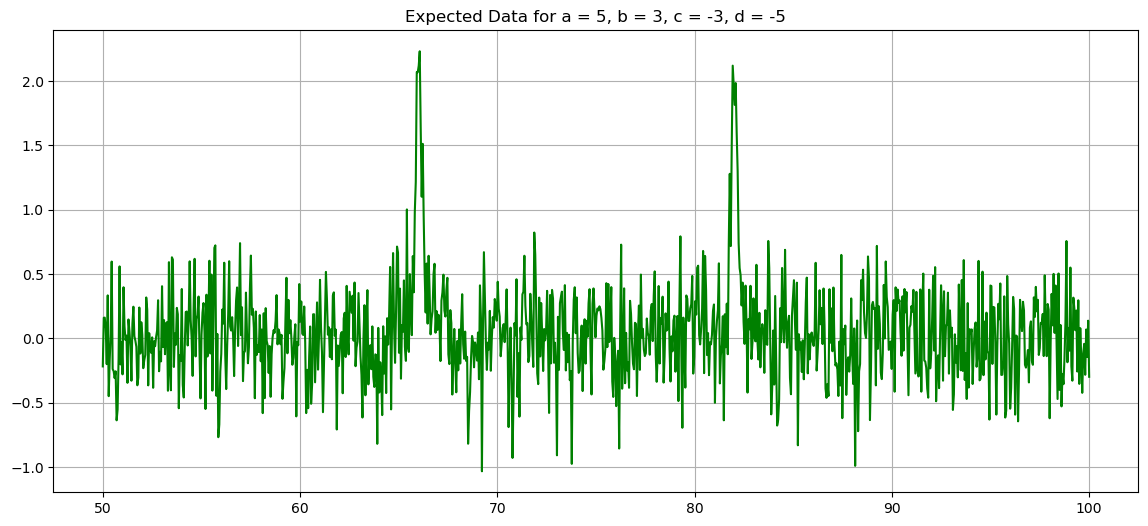

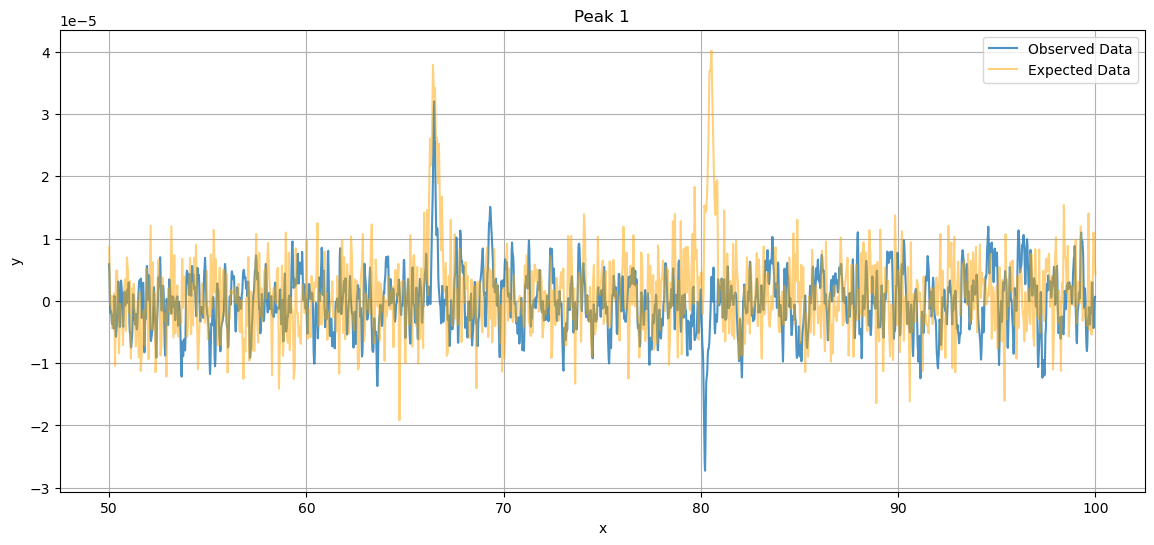

In [104]:
#test expected data function
expected_data(5,3,-3,-5)

#test plot data expected function
plot_data_and_expected('../lab_data/lab3/lab3_6/exp1/exp1_13C.csv', 'x', 'y', 'Peak 1', 5, 3, -3, -5)

In [90]:
a = 5 
b = 3
c = -3
d = -5

# Exp 1

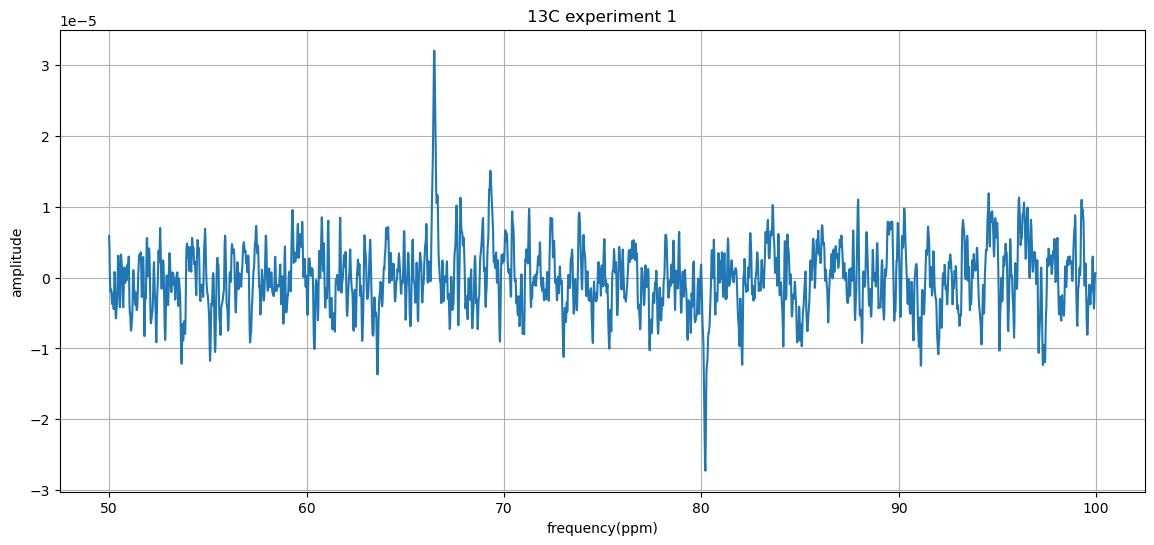

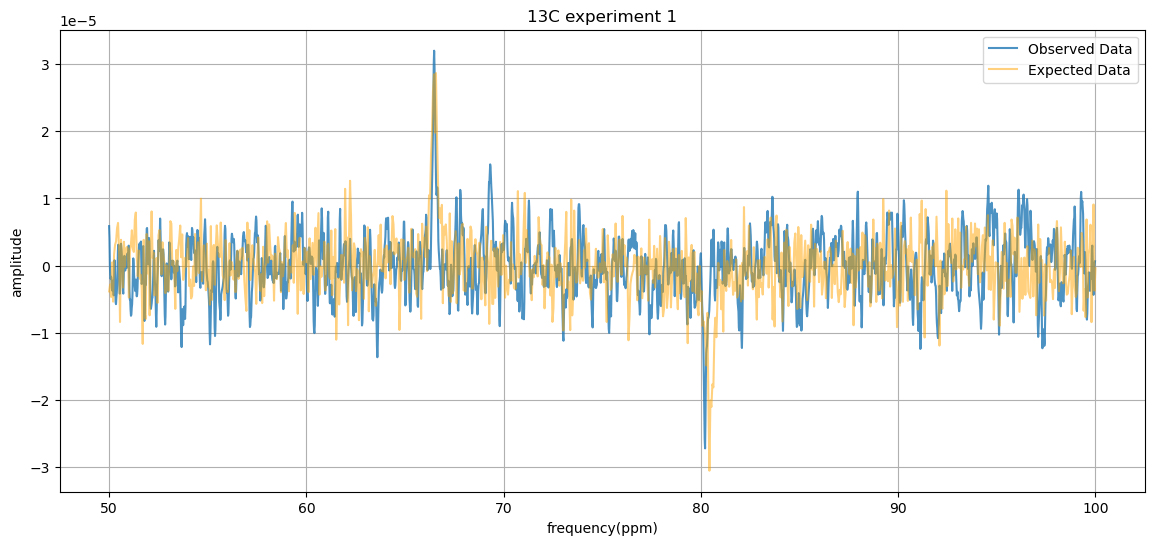

In [170]:
plot_data('../lab_data/lab3/lab3_6/exp1/exp1_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 1')
plot_data_and_expected('../lab_data/lab3/lab3_6/exp1/exp1_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 1', a, b, d, c)

# Exp 2

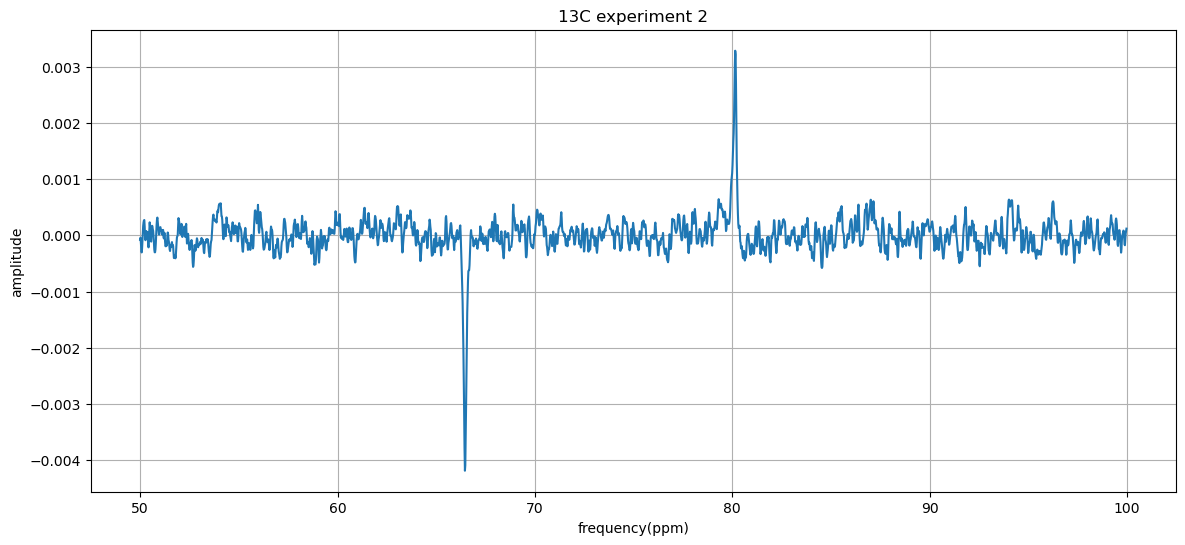

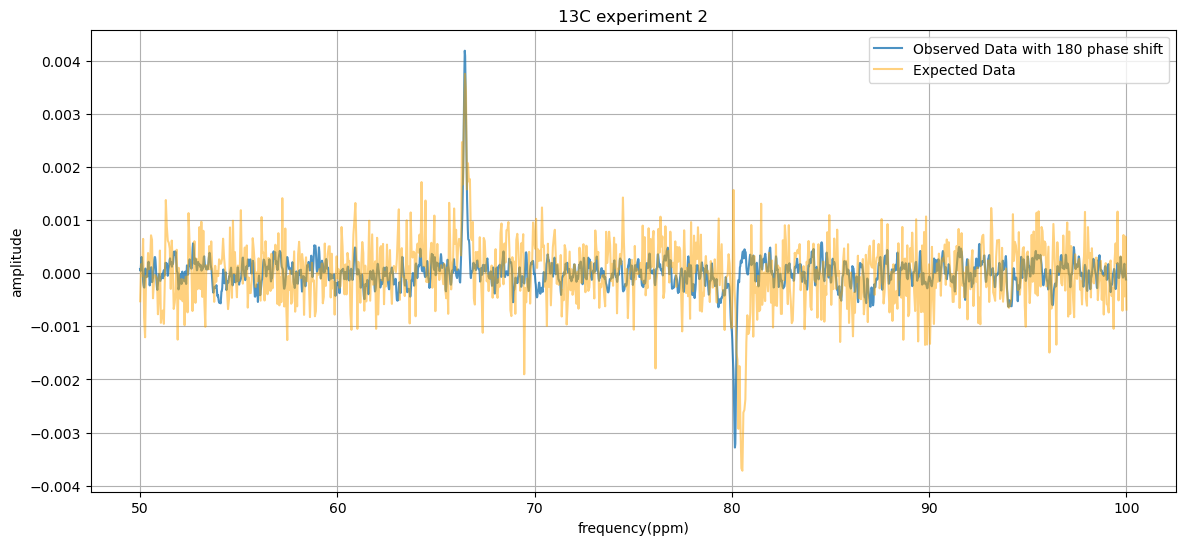

In [169]:
plot_data('../lab_data/lab3/lab3_5/exp2/lab3_exp2_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 2')
plot_data_and_expected('../lab_data/lab3/lab3_5/exp2/lab3_exp2_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 2', a, b, d, c, flip=True)

# Exp 3

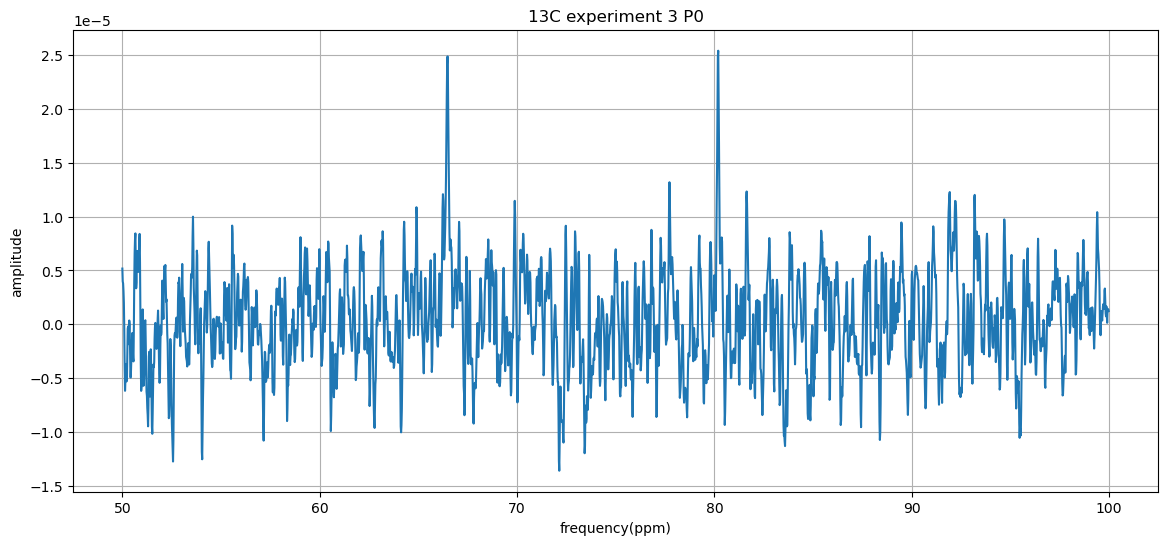

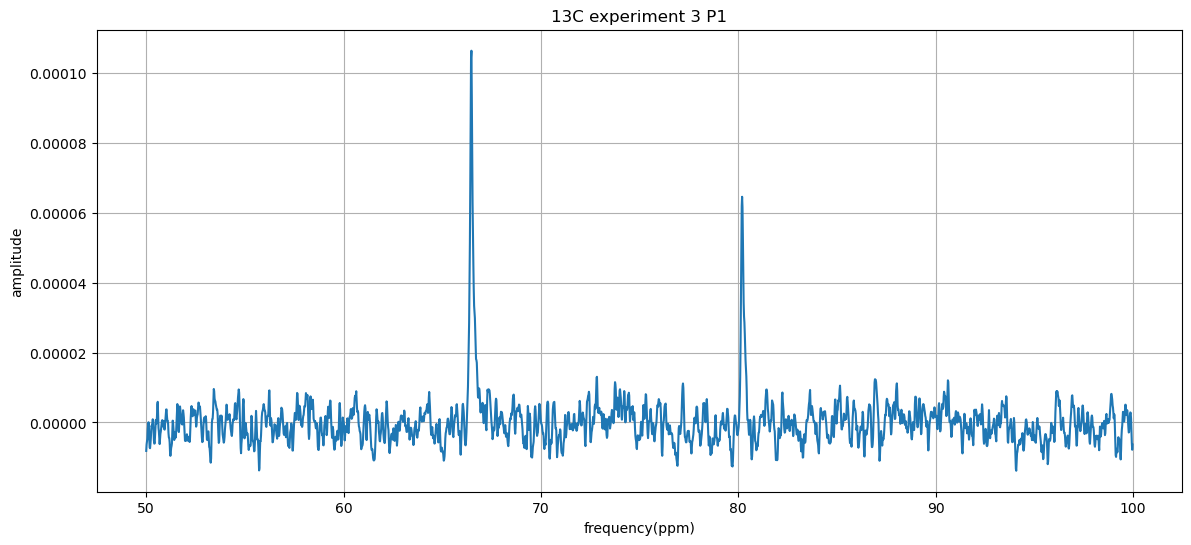

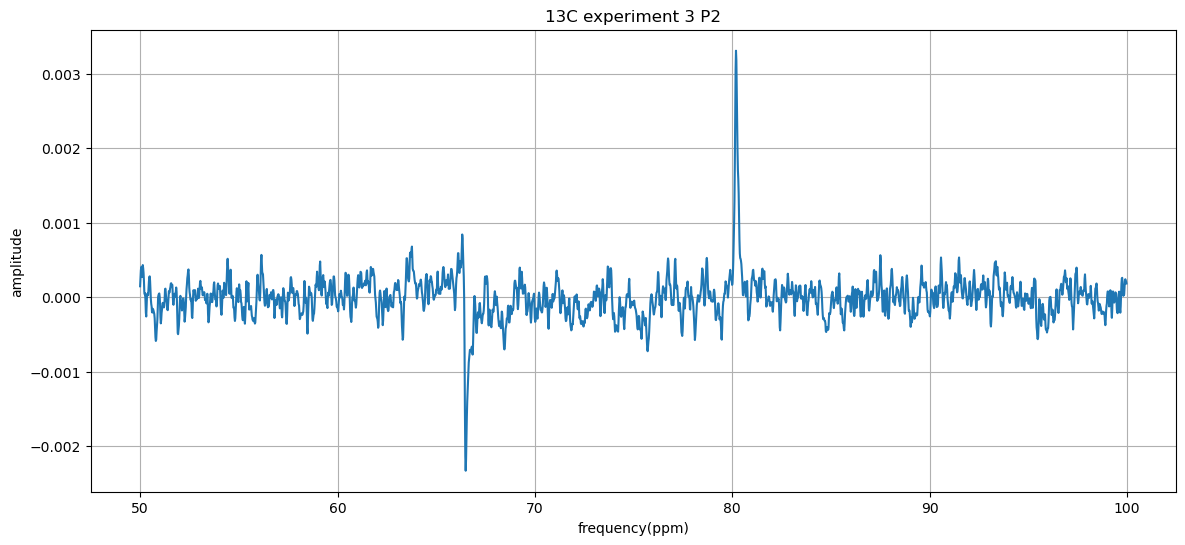

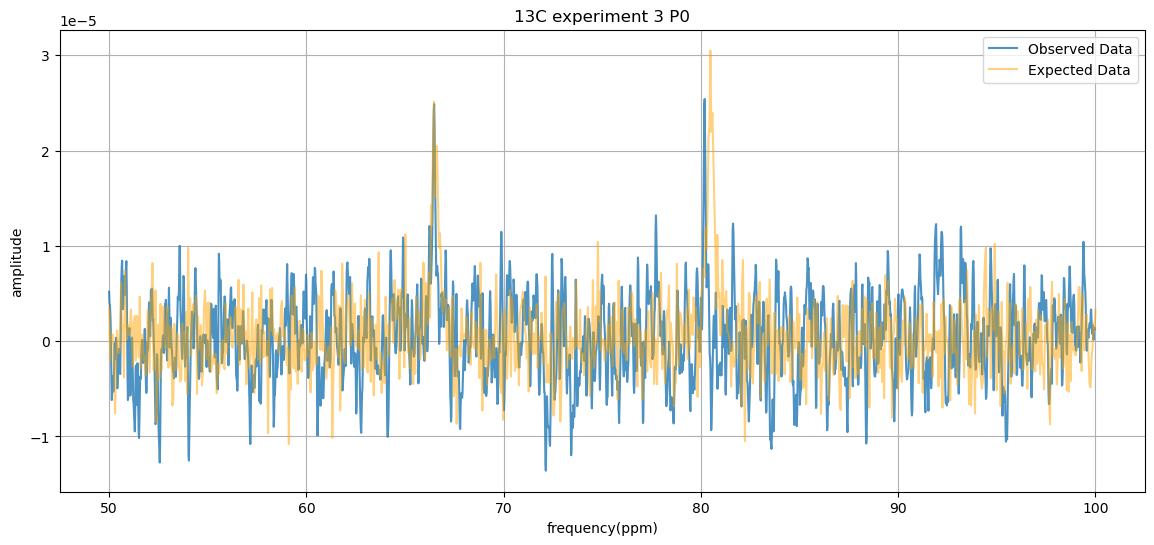

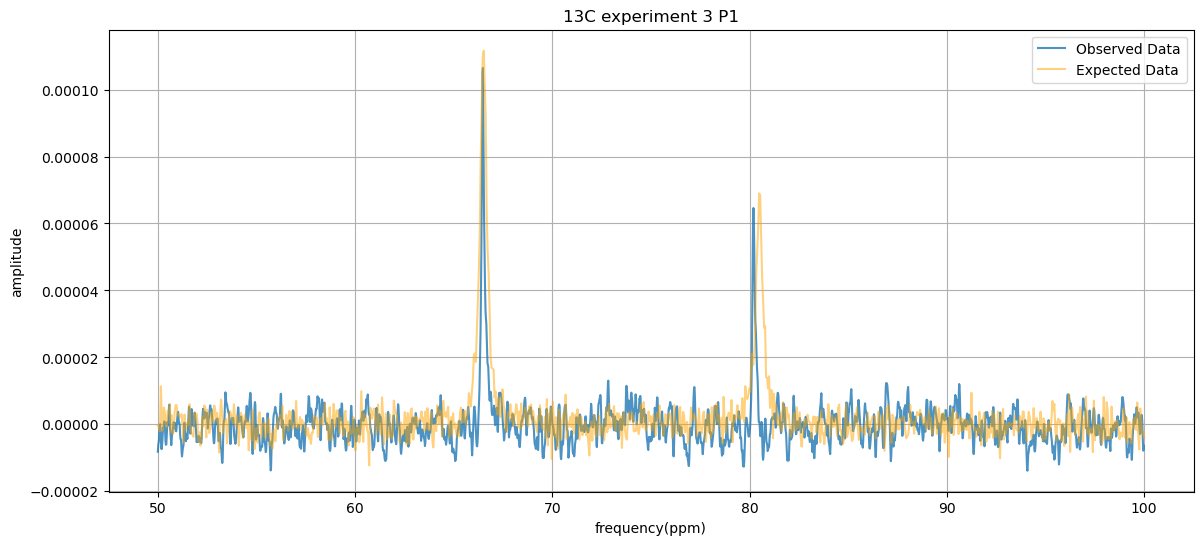

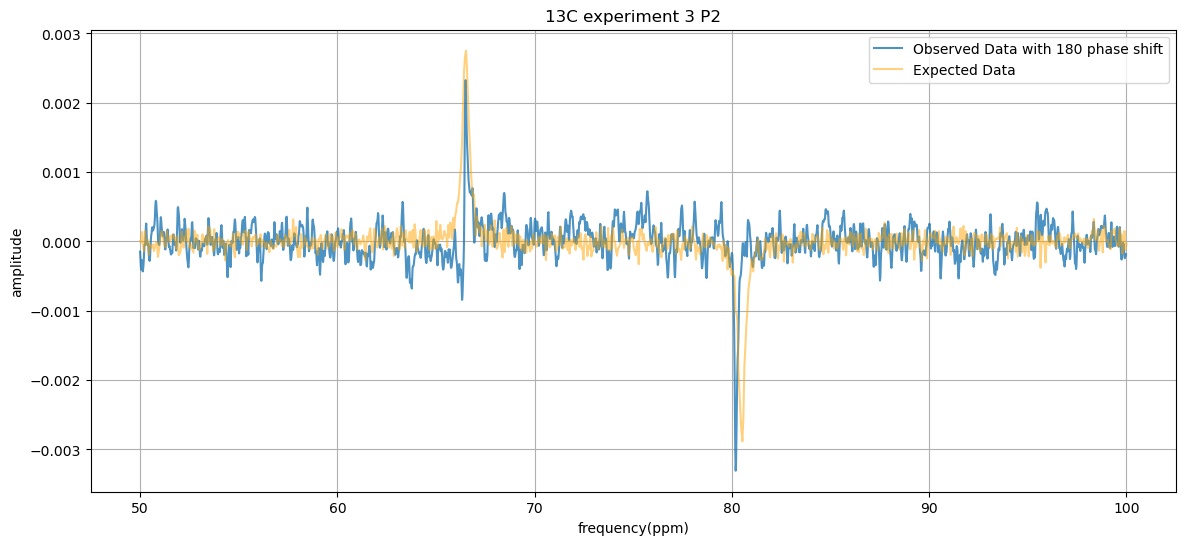

In [106]:
plot_data('../lab_data/lab3/lab3_6/exp3/exp3_P0_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 3 P0')
plot_data('../lab_data/lab3/lab3_6/exp3/exp3_P1_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 3 P1')
plot_data('../lab_data/lab3/lab3_6/exp3/exp3_P2_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 3 P2')

plot_data_and_expected('../lab_data/lab3/lab3_6/exp3/exp3_P0_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 3 P0', a, b, c, d)
plot_data_and_expected('../lab_data/lab3/lab3_6/exp3/exp3_P1_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 3 P1', a, d, b, c)
plot_data_and_expected('../lab_data/lab3/lab3_6/exp3/exp3_P2_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 3 P2', a, c, d, b, flip=True)



# Exp 4

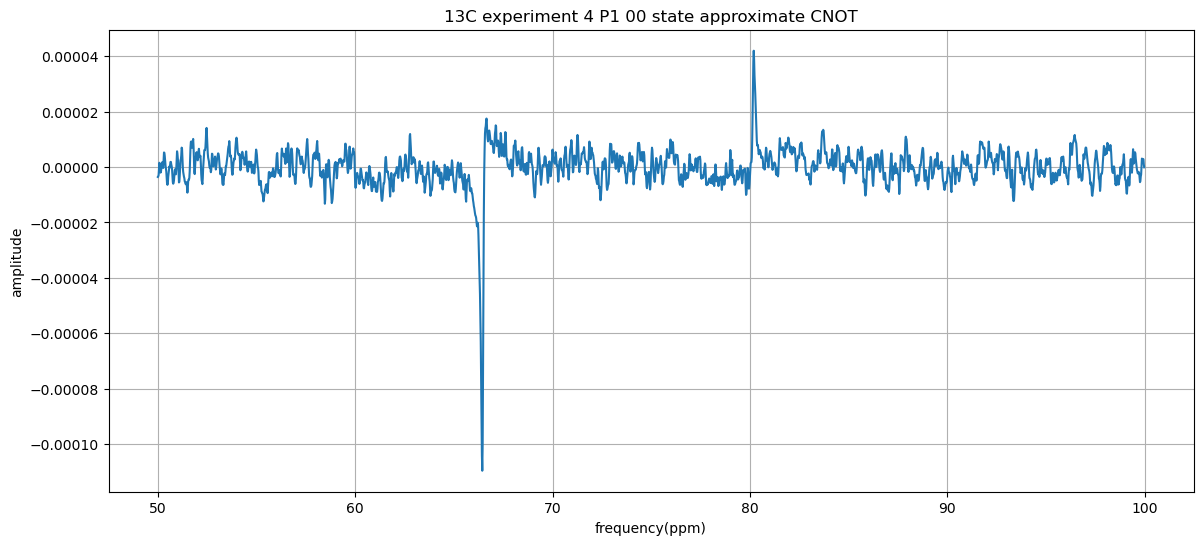

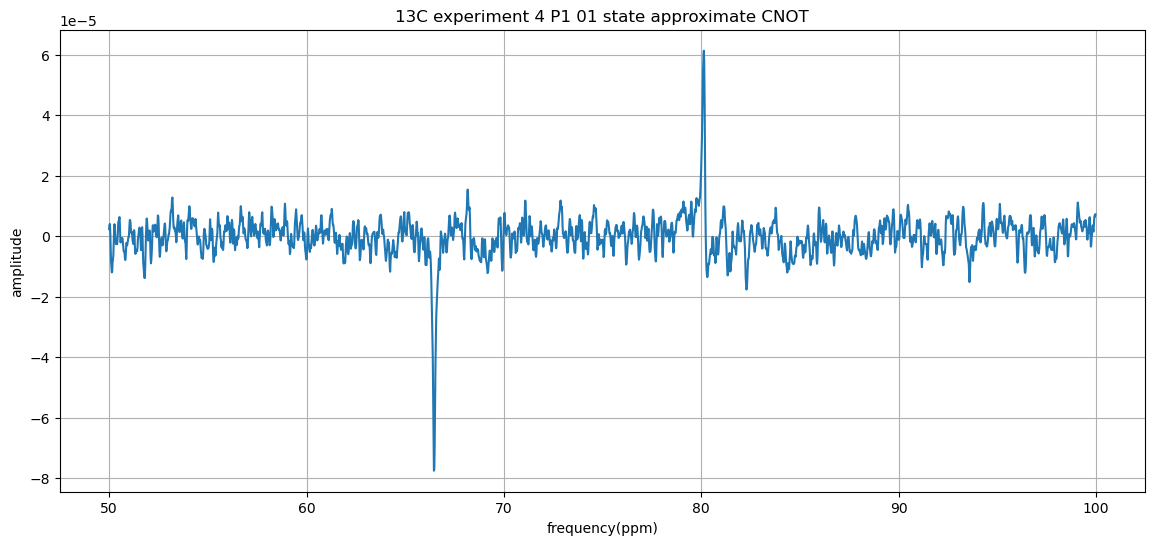

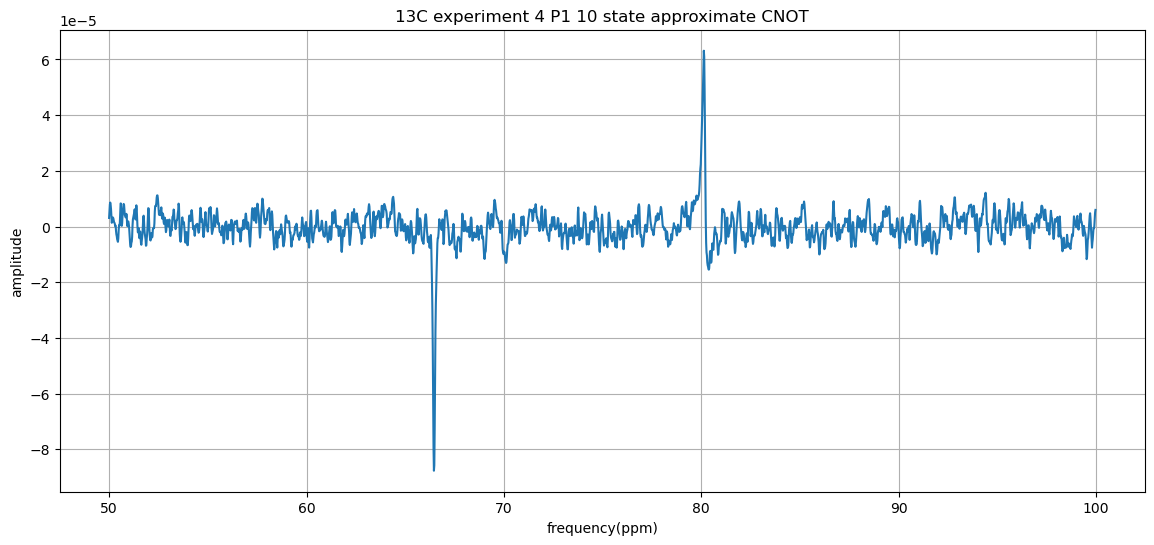

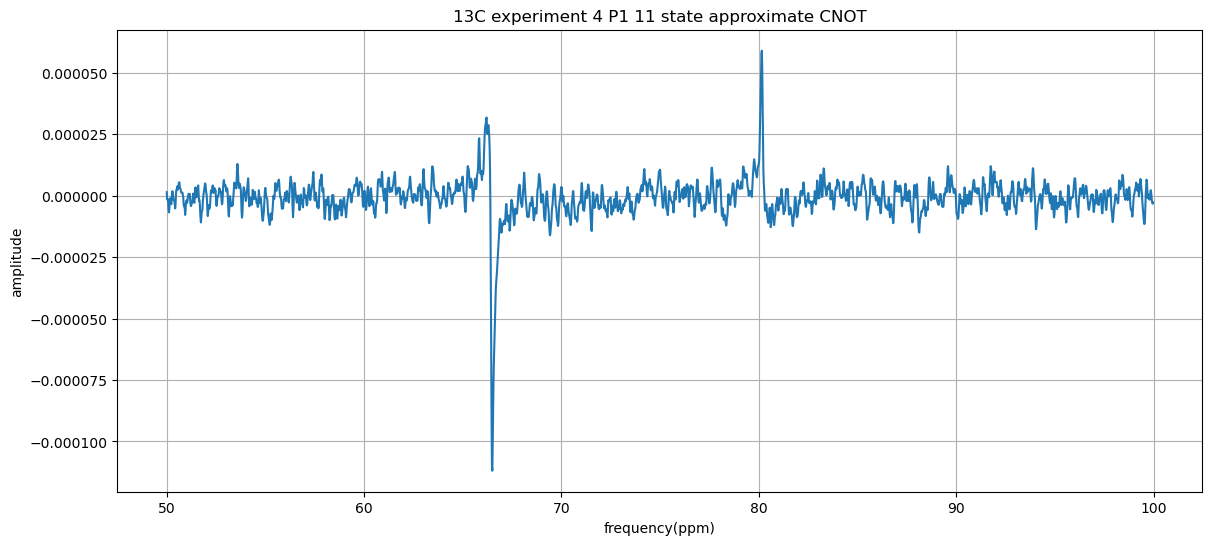

In [117]:
plot_data('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_00_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 00 state approximate CNOT')
plot_data('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_01_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 01 state approximate CNOT')
plot_data('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_10_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 10 state approximate CNOT')
plot_data('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_11_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 11 state approximate CNOT')

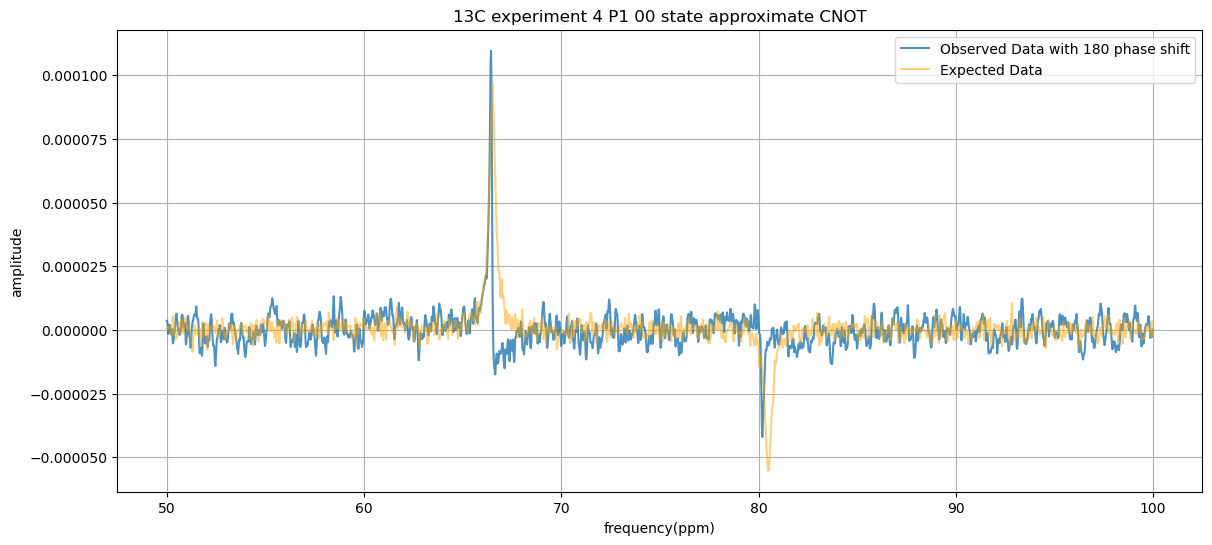

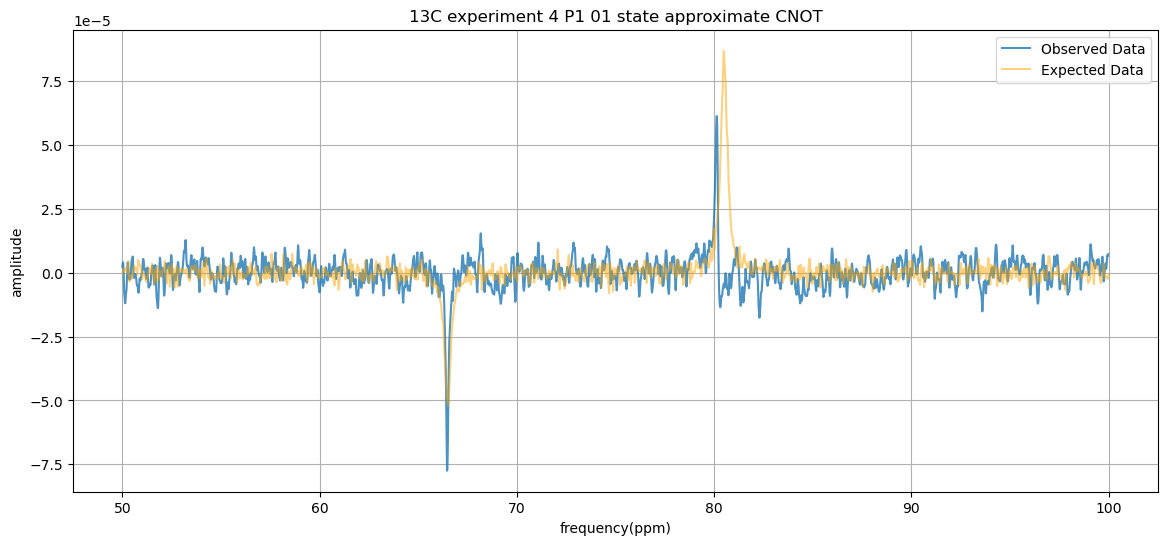

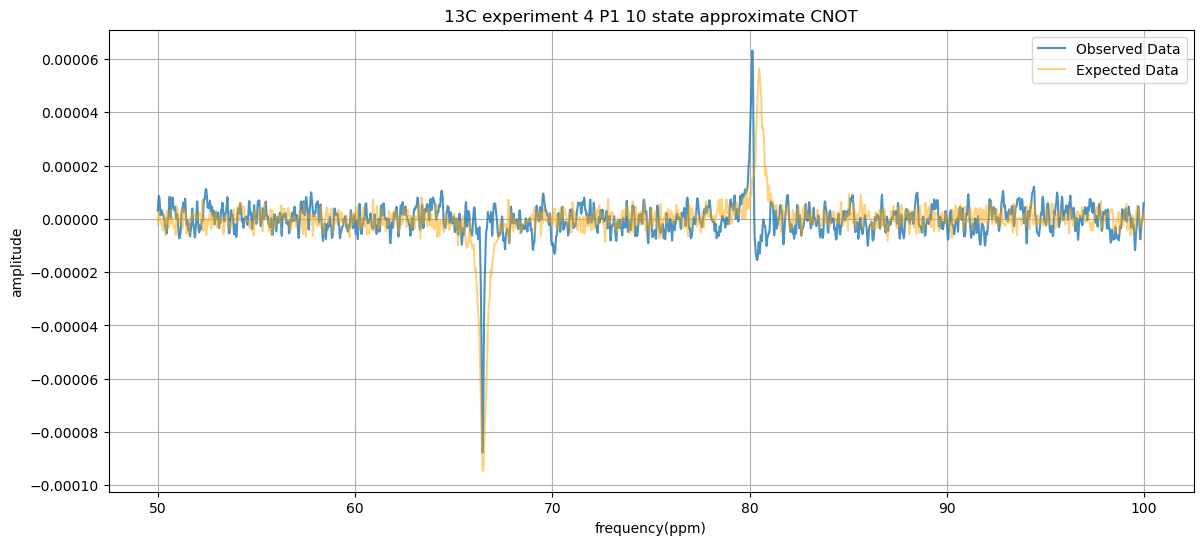

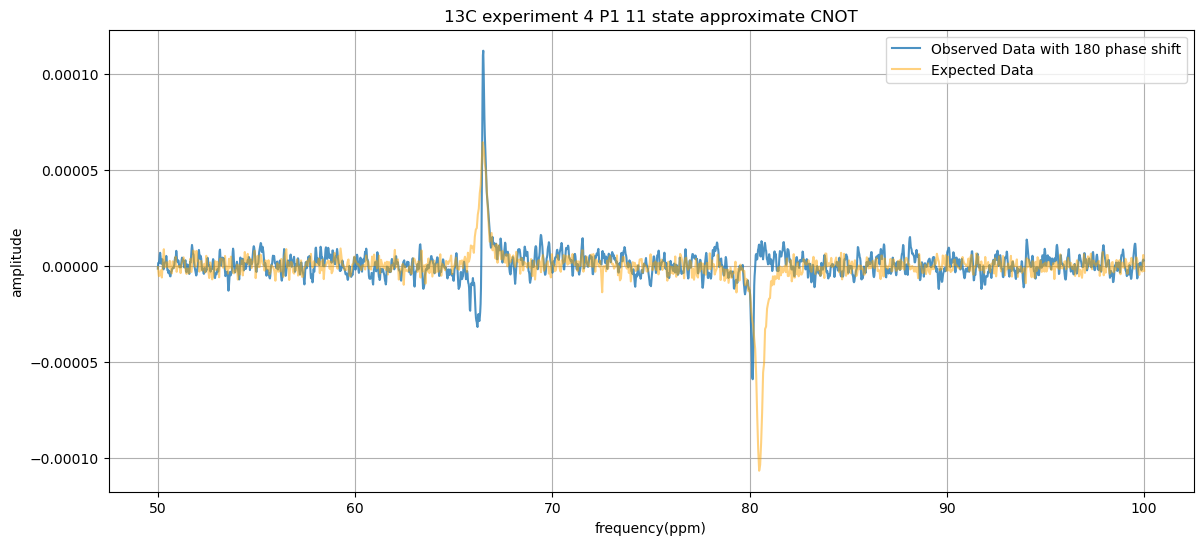

In [124]:
plot_data_and_expected('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_00_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 00 state approximate CNOT', a, d, c, b, flip=True)
plot_data_and_expected('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_01_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 01 state approximate CNOT', c, b, a, d)
plot_data_and_expected('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_10_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 10 state approximate CNOT', d, a, b, c)
plot_data_and_expected('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_11_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 11 state approximate CNOT', b, c, d, a, flip=True)

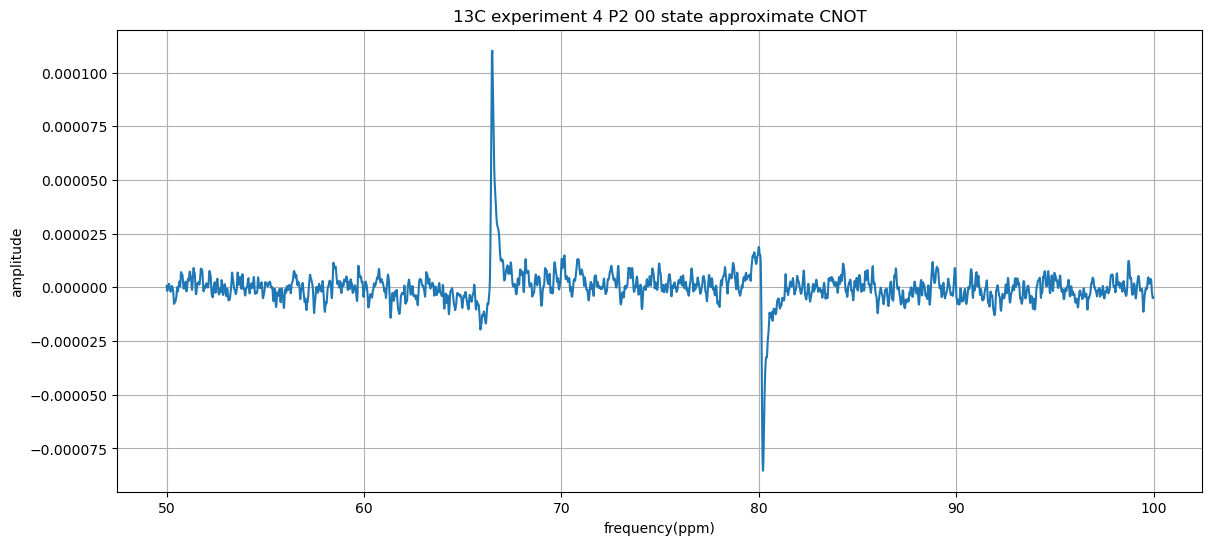

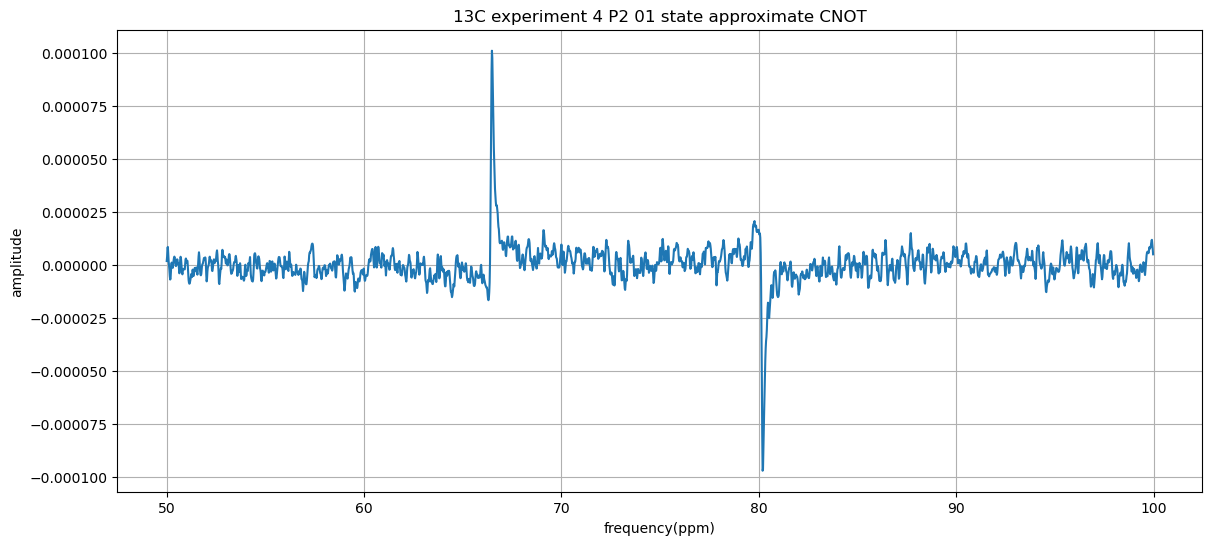

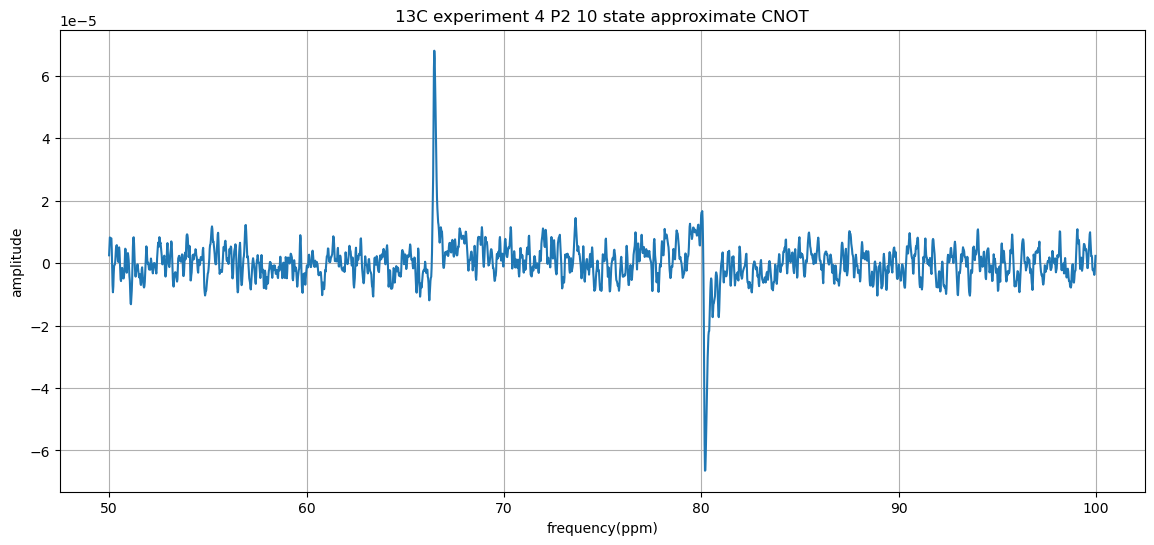

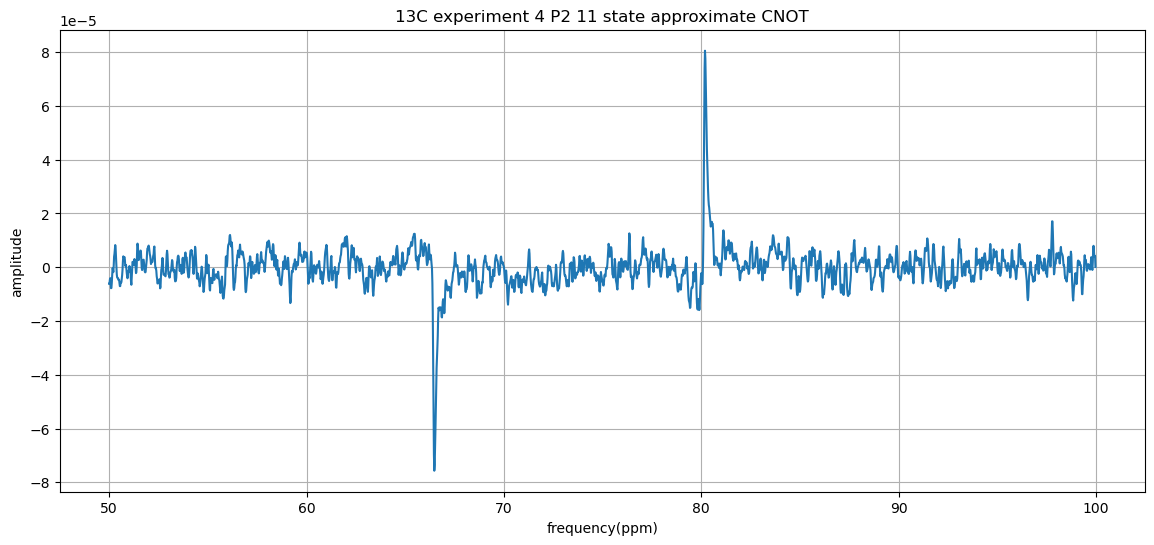

In [118]:
plot_data('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_00_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 00 state approximate CNOT')
plot_data('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_01_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 01 state approximate CNOT')
plot_data('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_10_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 10 state approximate CNOT')
plot_data('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_11_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 11 state approximate CNOT')


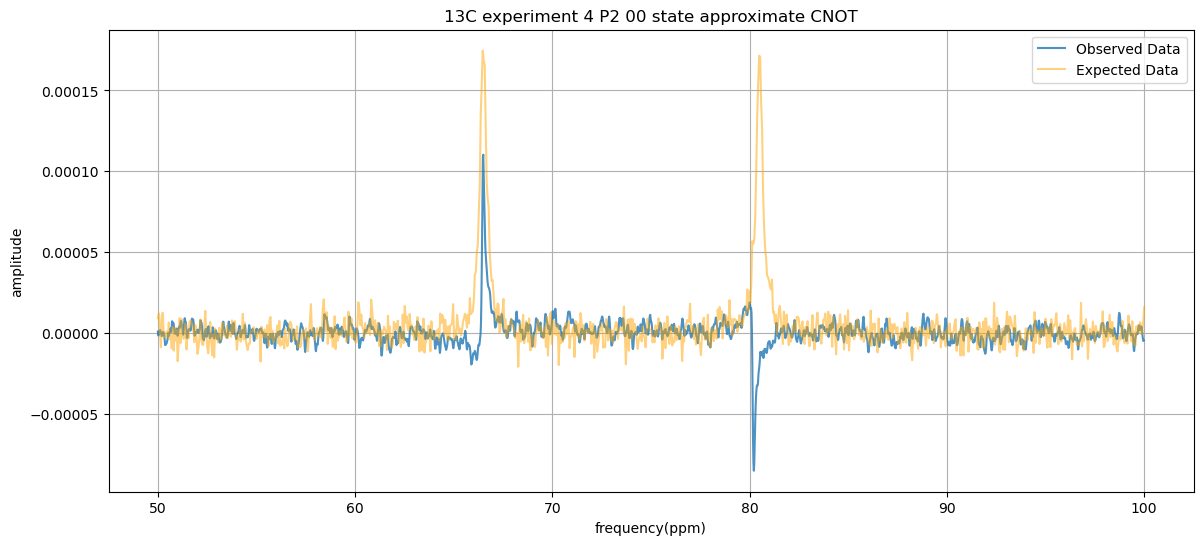

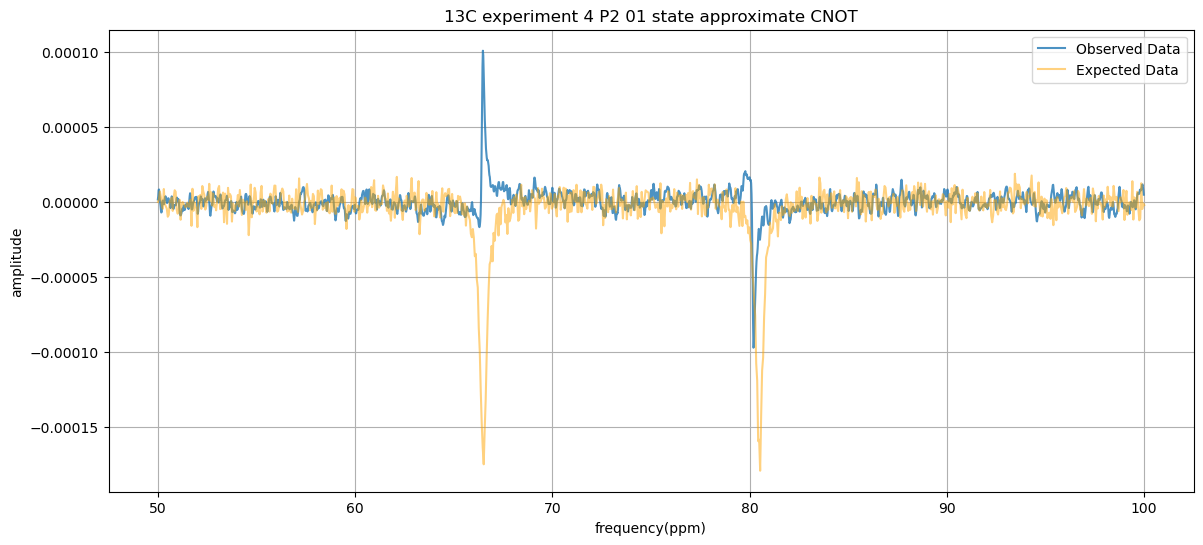

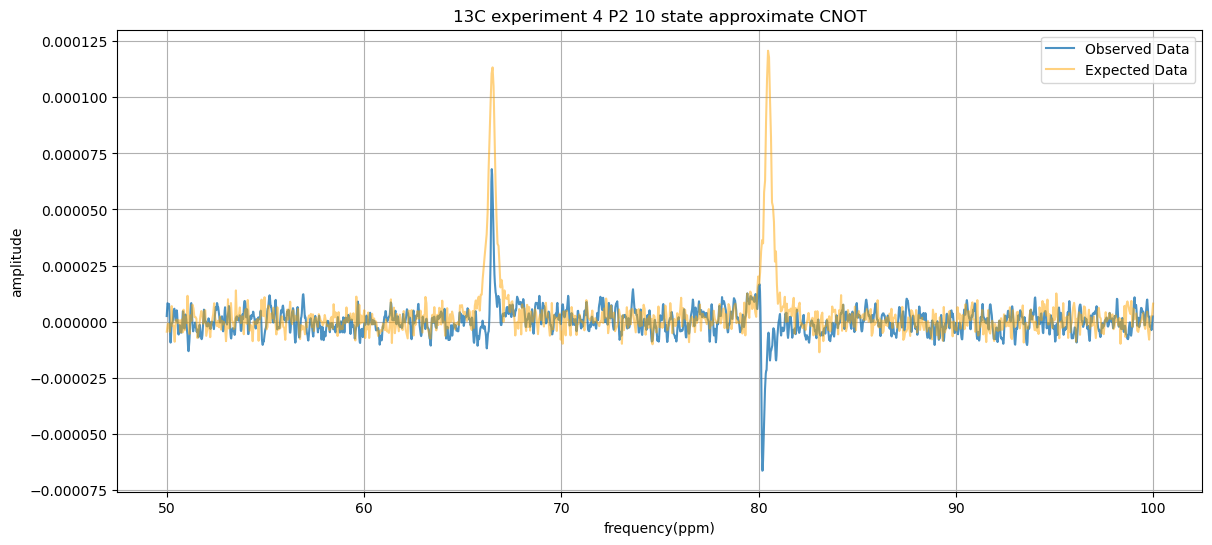

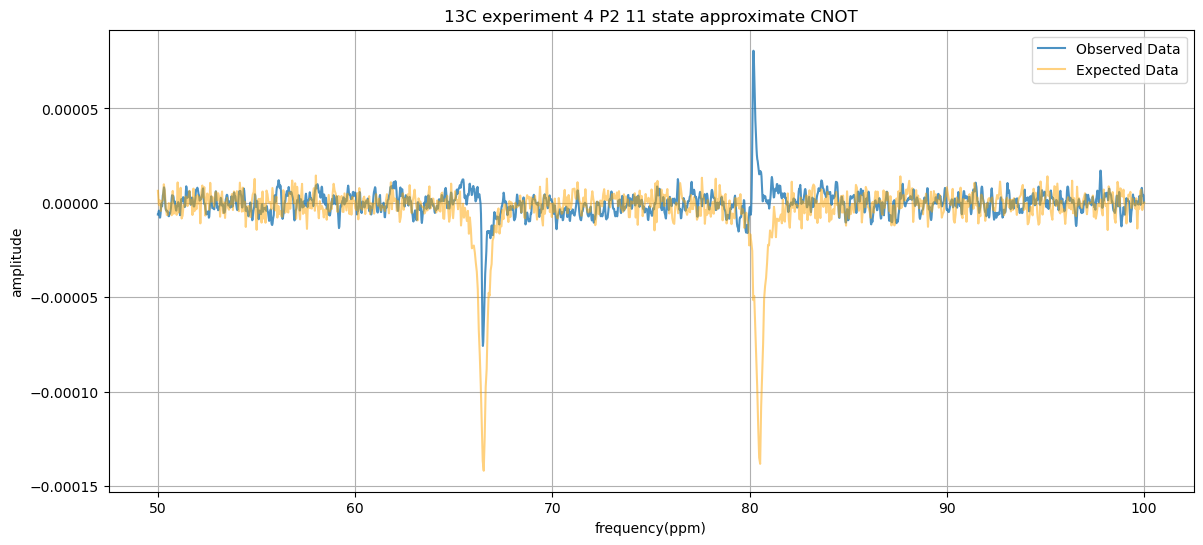

In [125]:
plot_data_and_expected('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_00_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 00 state approximate CNOT', a, c, b, d)
plot_data_and_expected('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_01_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 01 state approximate CNOT', d, b, c, a)
plot_data_and_expected('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_10_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 10 state approximate CNOT', b, d, a, c)
plot_data_and_expected('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_11_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 11 state approximate CNOT', c, a, d, b)

## Exact CNOT

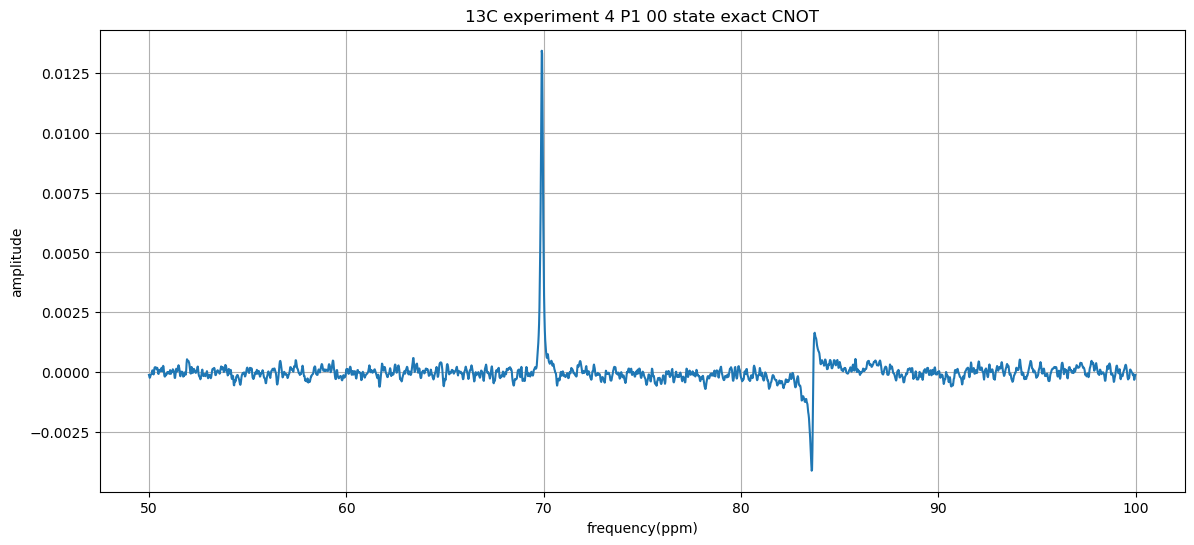

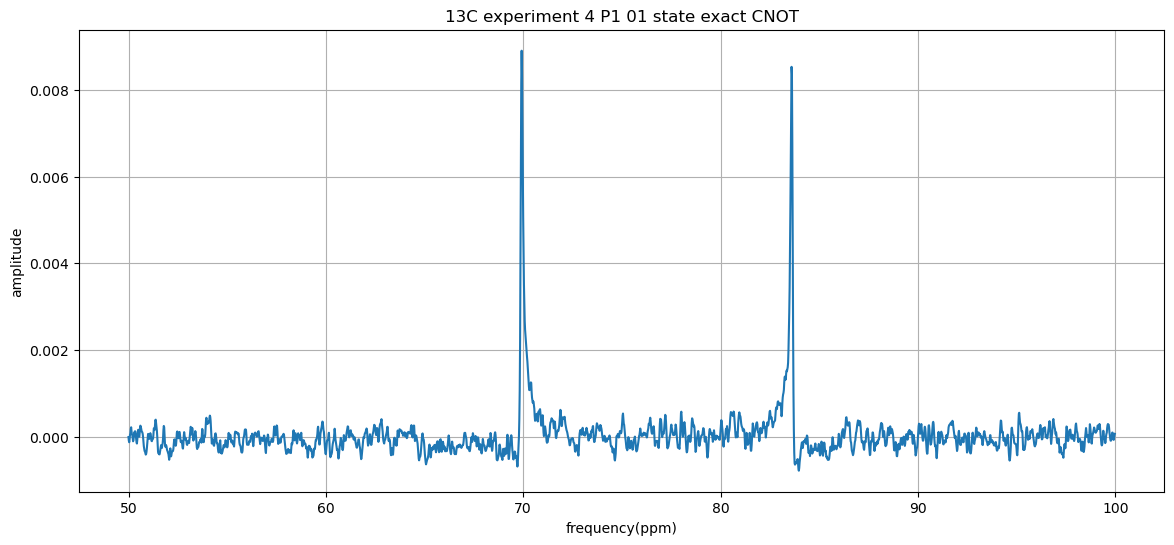

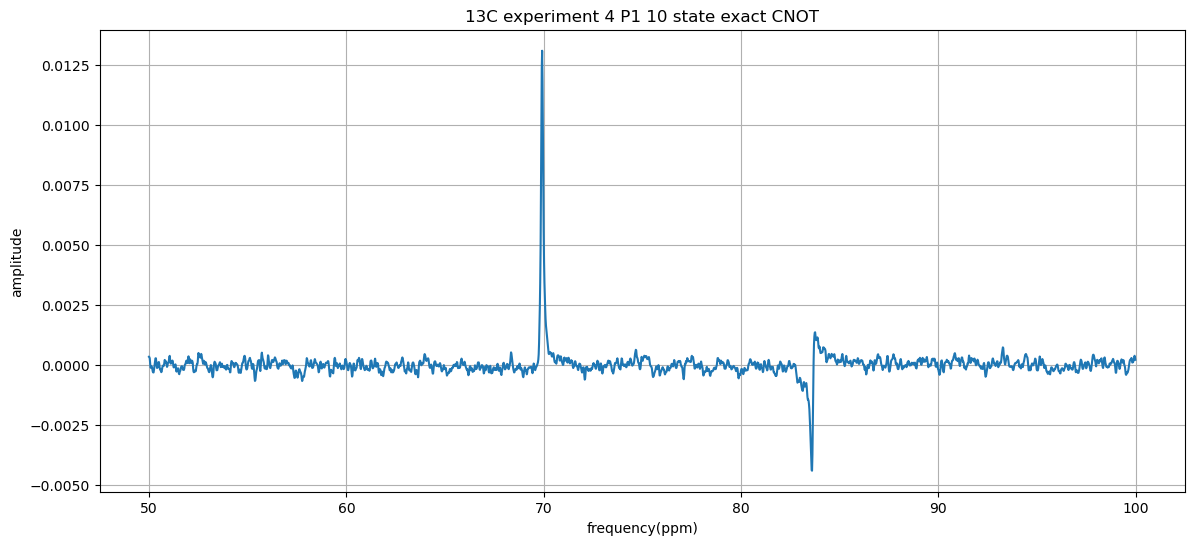

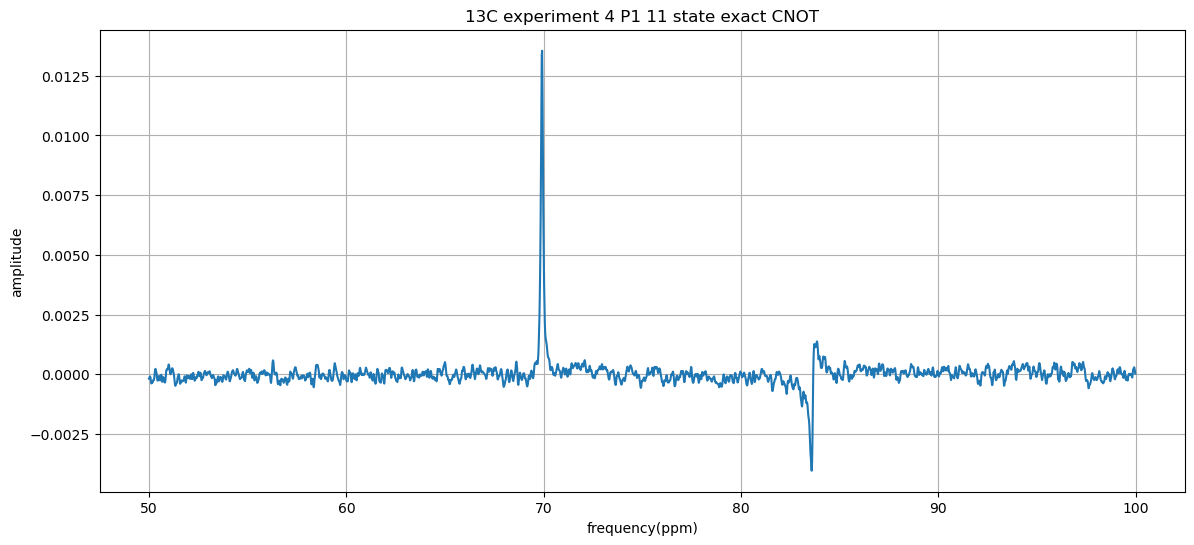

In [121]:
plot_data('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_00_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 00 state exact CNOT')
plot_data('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_01_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 01 state exact CNOT')
plot_data('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_10_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 10 state exact CNOT')
plot_data('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_11_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 11 state exact CNOT')

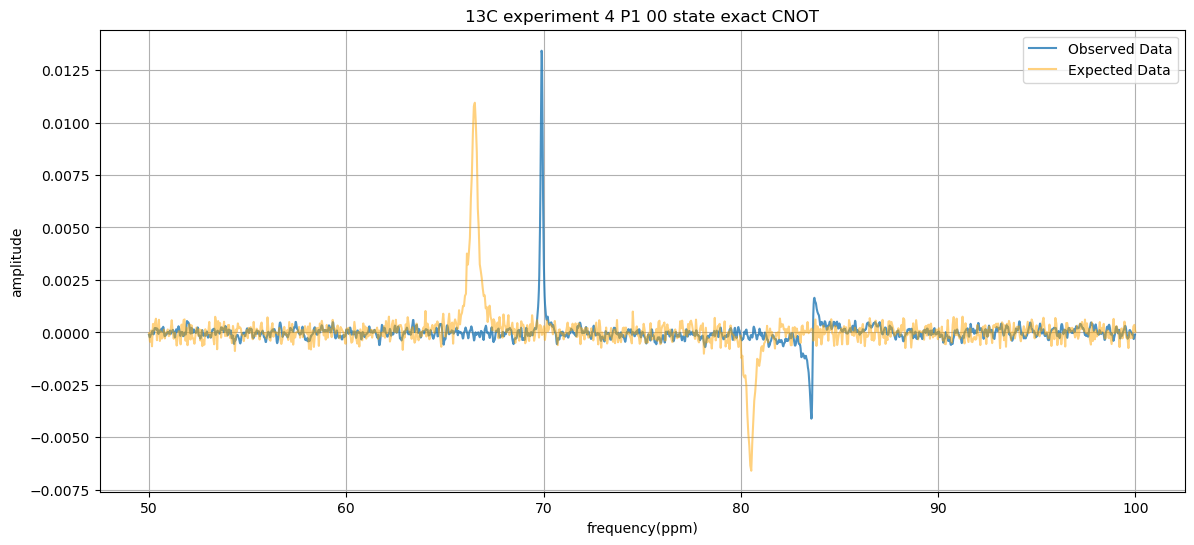

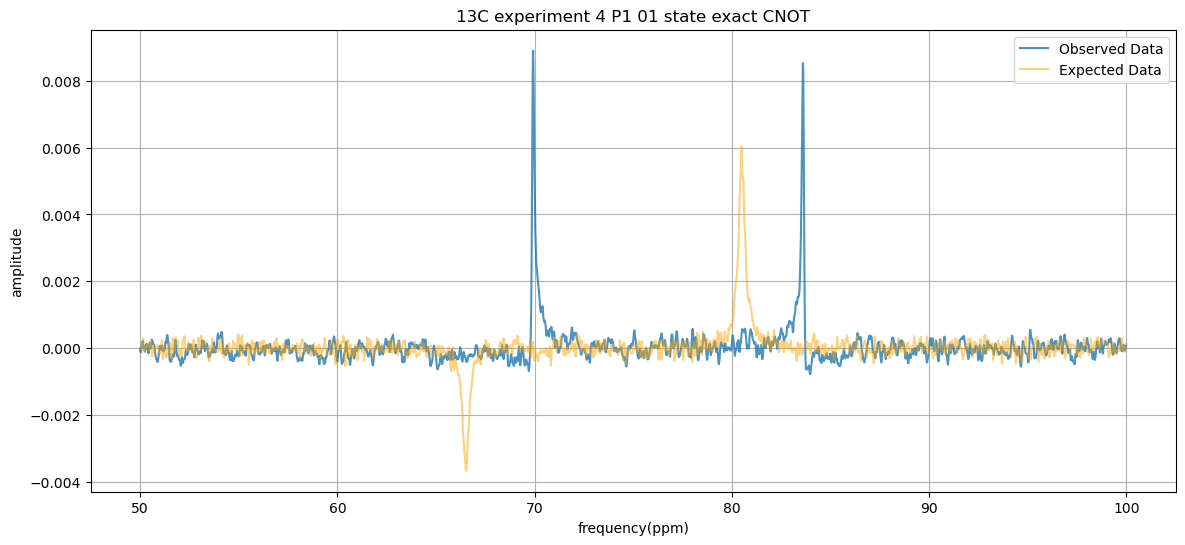

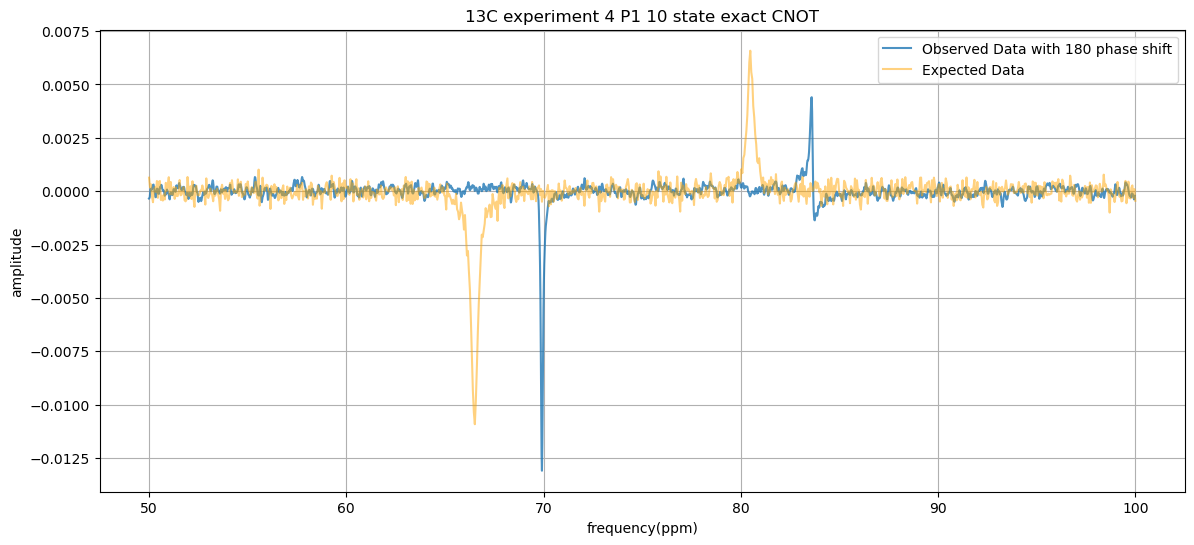

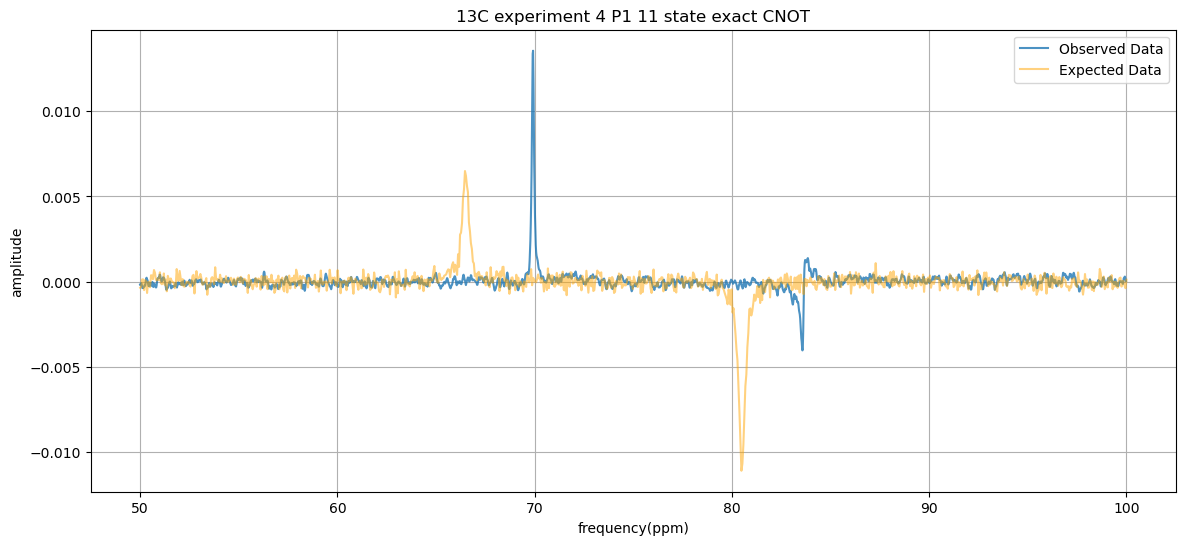

In [127]:
plot_data_and_expected('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_00_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 00 state exact CNOT', a, d, c, b)
plot_data_and_expected('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_01_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 01 state exact CNOT', c, b, a, d)
plot_data_and_expected('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_10_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 10 state exact CNOT', d, a, b, c, flip=True)
plot_data_and_expected('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_11_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P1 11 state exact CNOT', b, c, d, a)

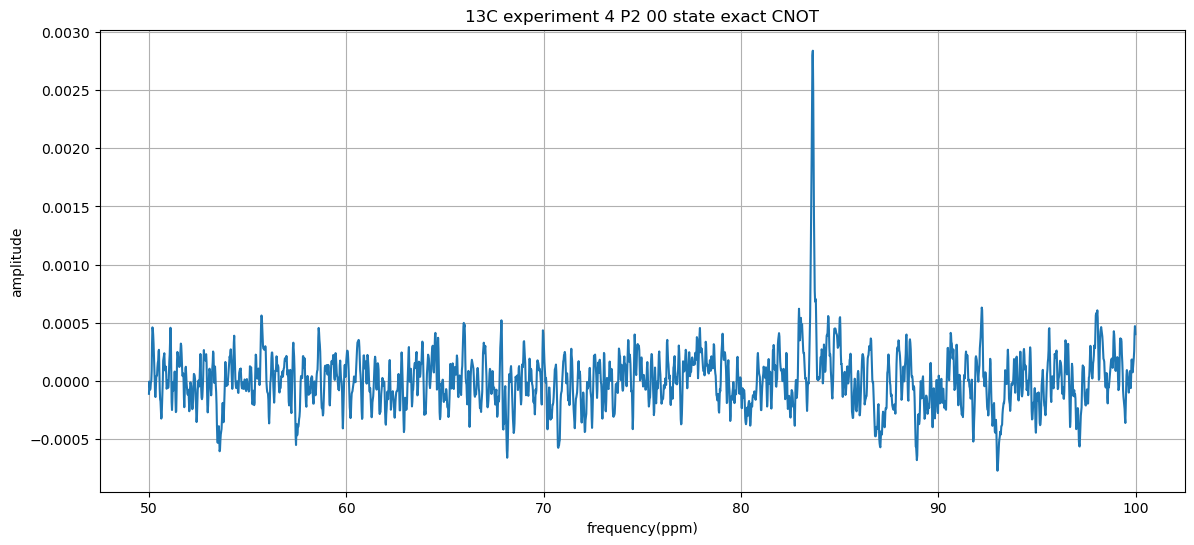

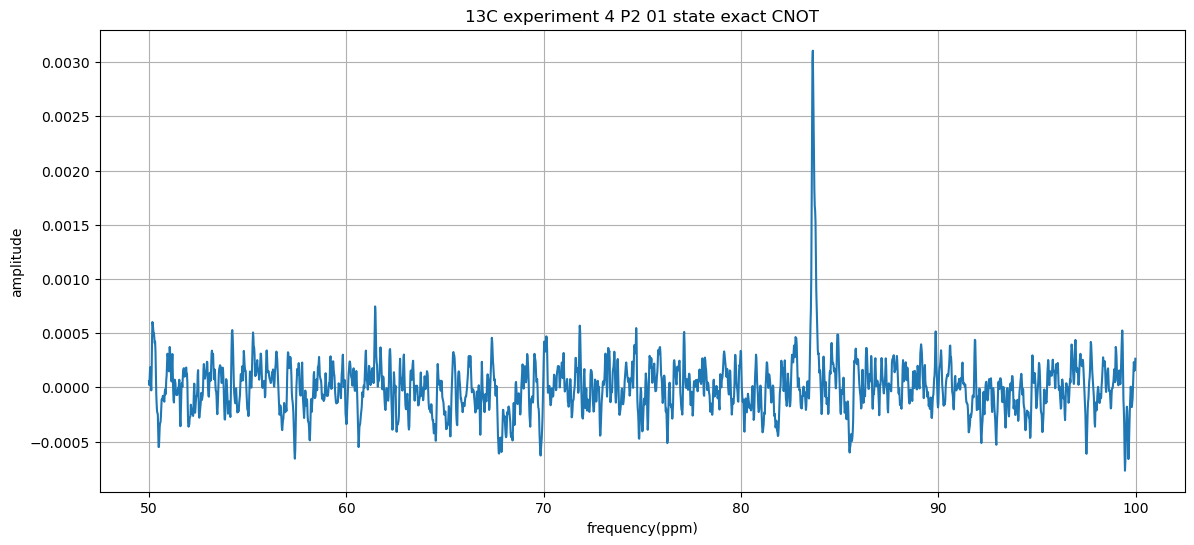

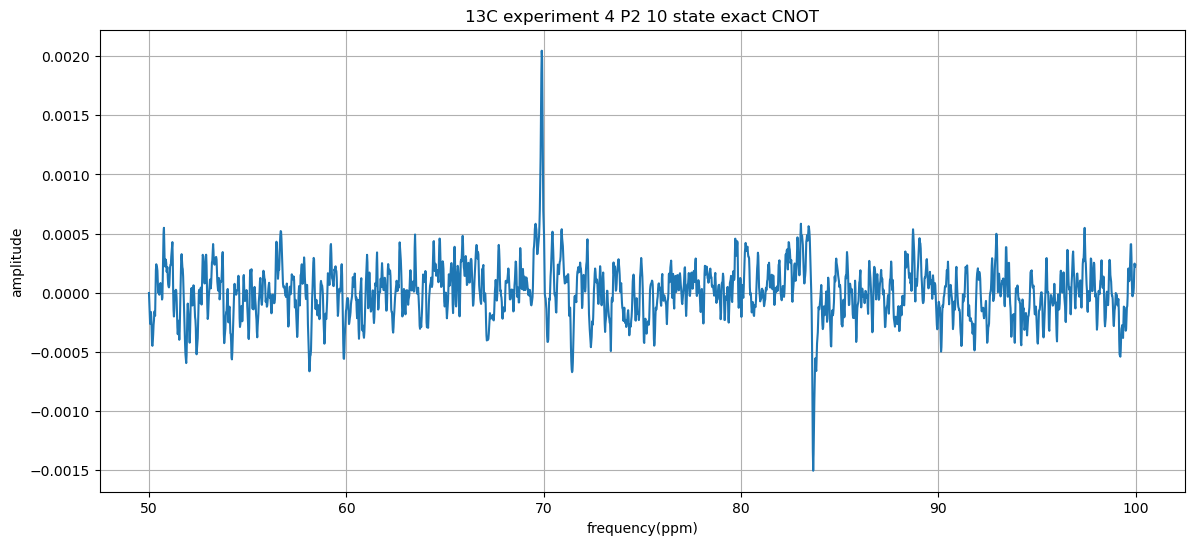

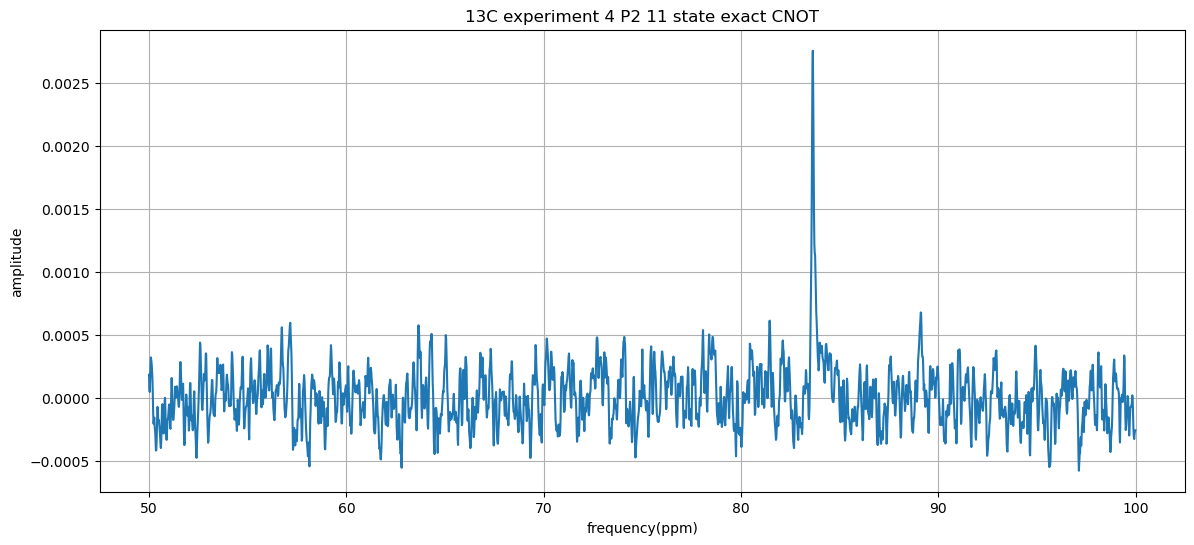

In [120]:
plot_data('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_00_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 00 state exact CNOT')
plot_data('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_01_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 01 state exact CNOT')
plot_data('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_10_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 10 state exact CNOT')
plot_data('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_11_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 11 state exact CNOT')


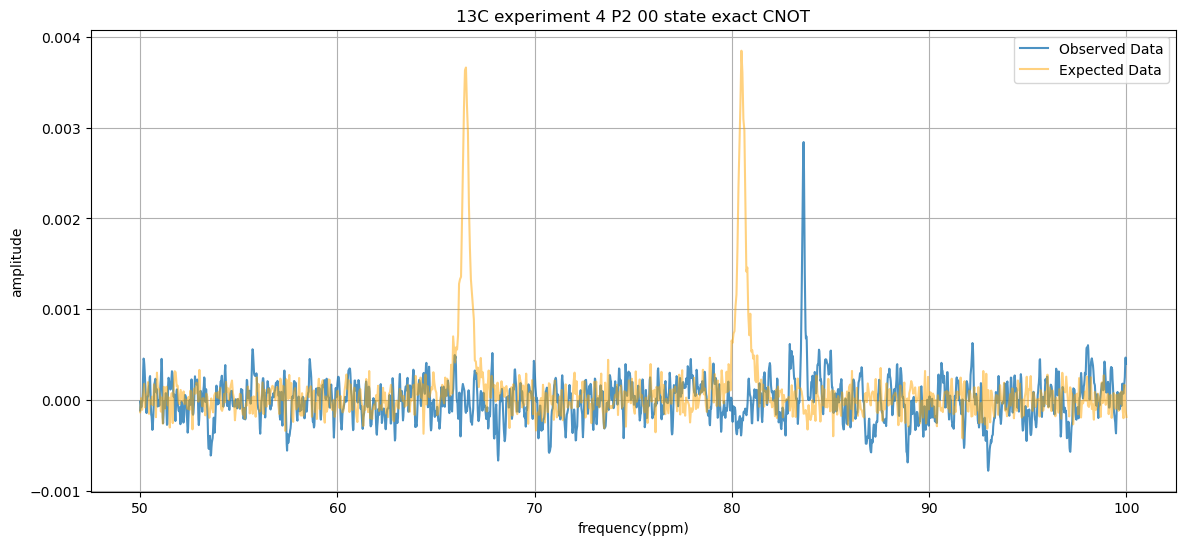

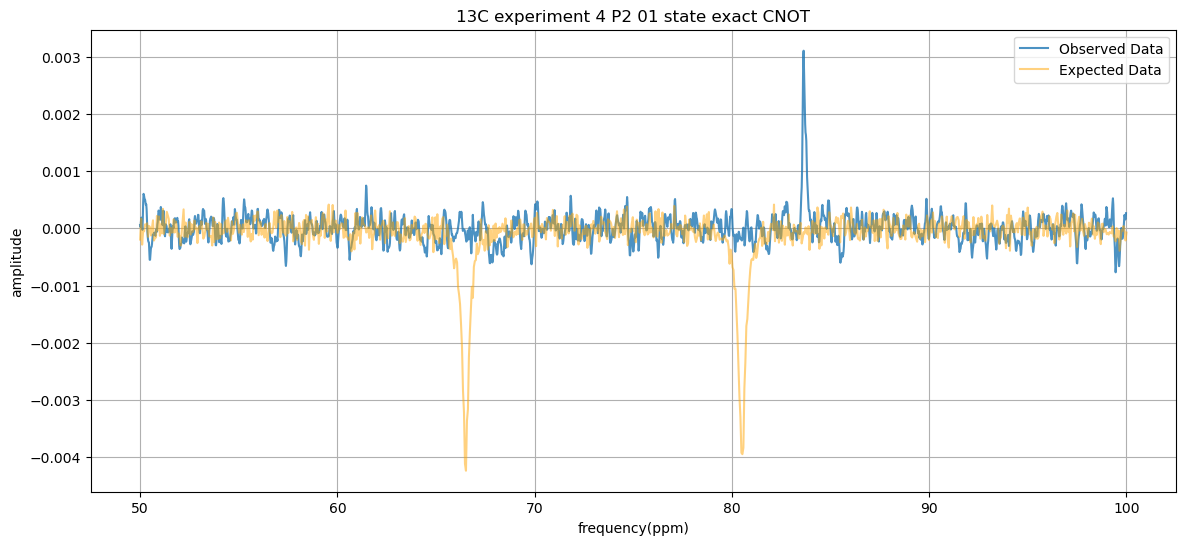

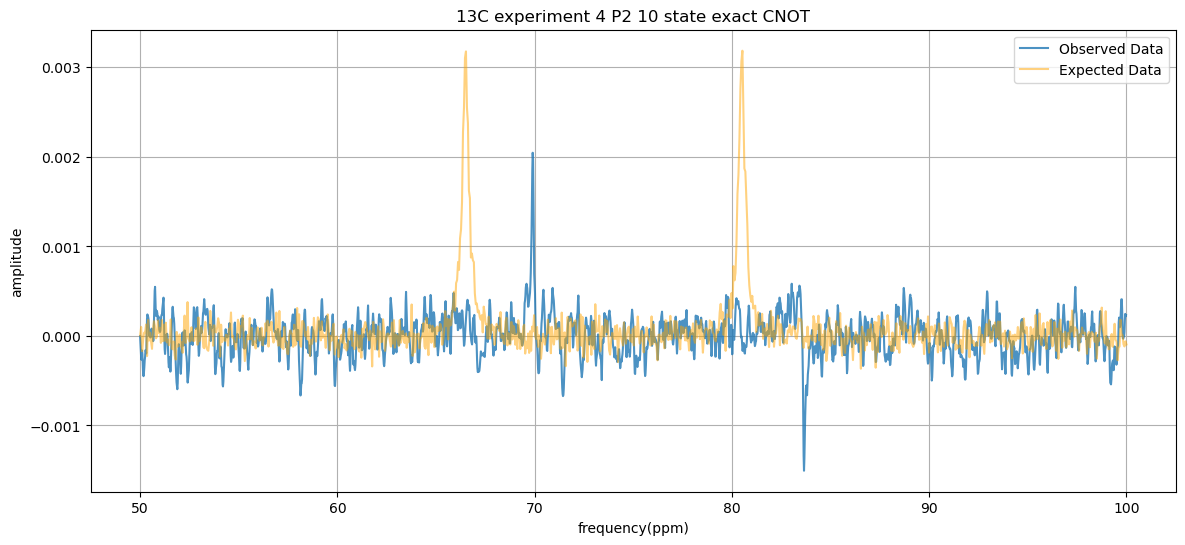

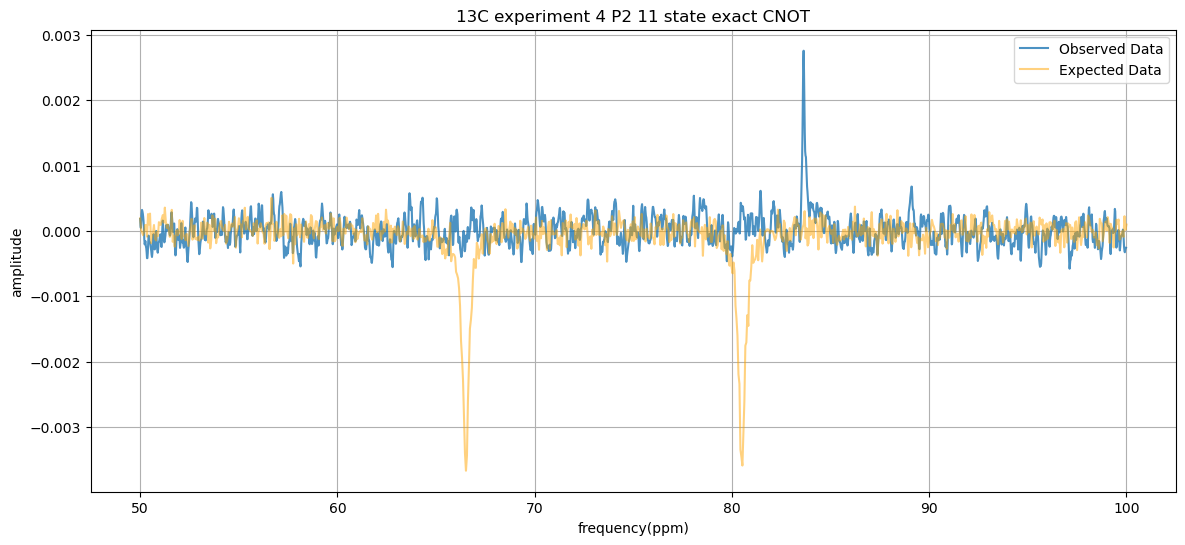

In [128]:
plot_data_and_expected('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_00_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 00 state exact CNOT', a, c, b, d)
plot_data_and_expected('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_01_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 01 state exact CNOT', d, b, c, a)
plot_data_and_expected('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_10_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 10 state exact CNOT', b, d, a, c)
plot_data_and_expected('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_11_13C.csv', 'frequency(ppm)', 'amplitude', '13C experiment 4 P2 11 state exact CNOT', c, a, d, b)

In [140]:
# function to find the x value where the y value is the maximum from a csv file
def find_max_x(filename, x_col, y_col):
    df = pd.read_csv(filename)
    df.columns = ['frequency(ppm)', 'amplitude', 'phase']
    x = df[x_col]
    y = df[y_col]
    max_y = max(y)
    max_x = x[y == max_y]
    return [max_x, max_y]

print(find_max_x('../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_00_13C.csv', 'frequency(ppm)', 'amplitude'))
print(find_max_x('../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_00_13C.csv', 'frequency(ppm)', 'amplitude'))
print(find_max_x('../lab_data/lab3/lab3_5/exp2/lab3_exp2_13C.csv', 'frequency(ppm)', 'amplitude'))
print(83.634 - 80.1517)

[8532    83.634
Name: frequency(ppm), dtype: float64, 0.00283991]
[7651    66.4945
Name: frequency(ppm), dtype: float64, 0.000110221]
[8353    80.1517
Name: frequency(ppm), dtype: float64, 0.00328242]
3.482299999999995


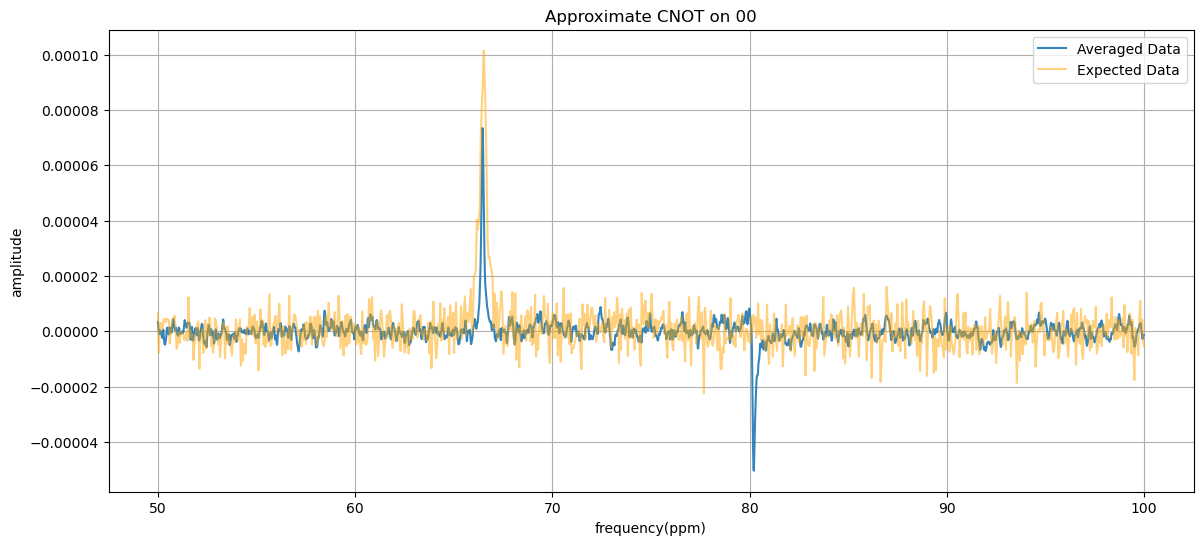

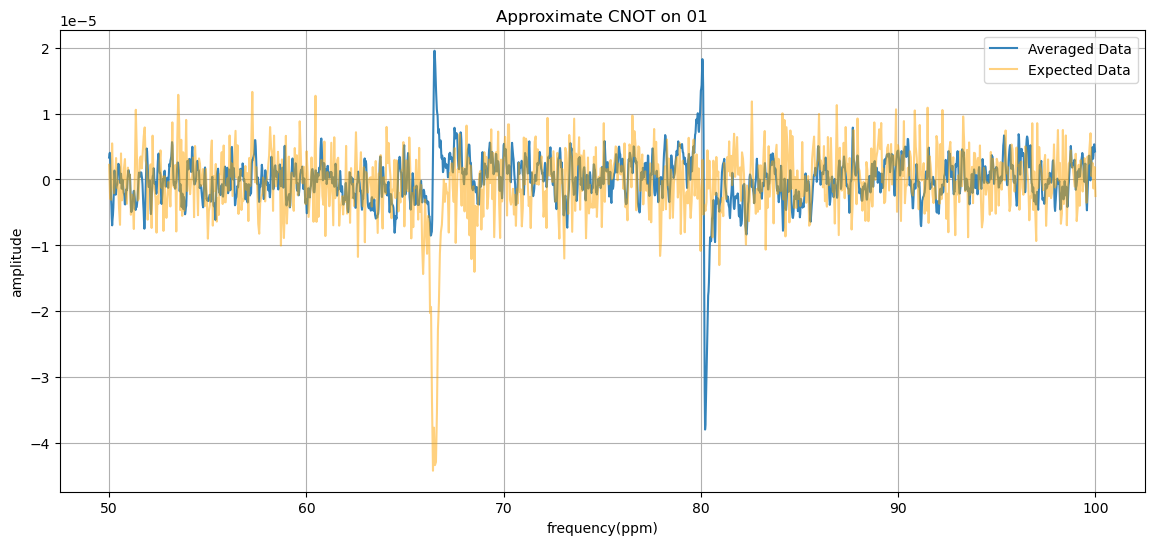

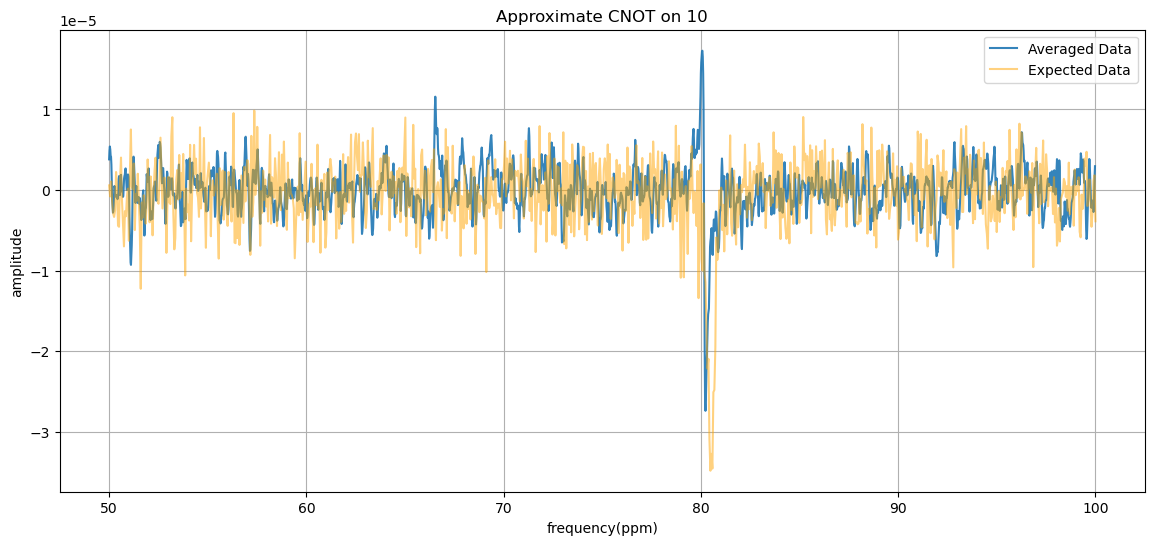

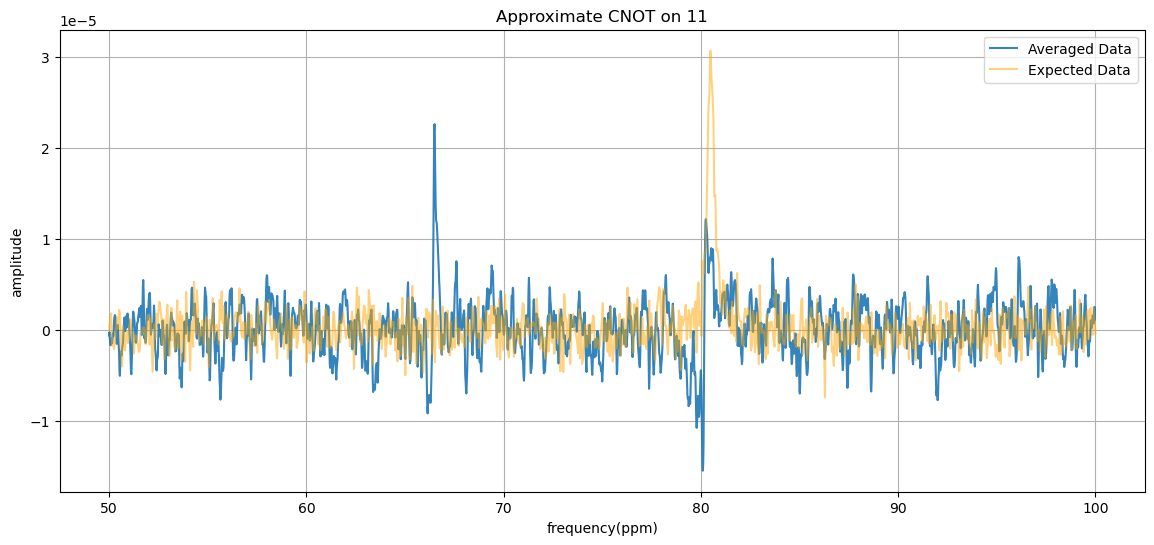

In [168]:
plot_data_with_offset('../lab_data/lab3/lab3_6/exp1/exp1_13C.csv', '../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_00_13C.csv', '../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_00_13C.csv' , x_name='frequency(ppm)', y_name='amplitude', title_name='Approximate CNOT on 00', a=a, b=0, c=0, d=0, flip2=True)
plot_data_with_offset('../lab_data/lab3/lab3_6/exp1/exp1_13C.csv', '../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_01_13C.csv', '../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_01_13C.csv' , x_name='frequency(ppm)', y_name='amplitude', title_name='Approximate CNOT on 01', a=0, b=b, c=0, d=0, flip3=False)
plot_data_with_offset('../lab_data/lab3/lab3_6/exp1/exp1_13C.csv', '../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_10_13C.csv', '../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_10_13C.csv' , x_name='frequency(ppm)', y_name='amplitude', title_name='Approximate CNOT on 10', a=0, b=0, c=c, d=0, flip3=False)
plot_data_with_offset('../lab_data/lab3/lab3_6/exp1/exp1_13C.csv', '../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p1_11_13C.csv', '../lab_data/lab3/lab3_6/exp4_correct_probably/APPROX/lab3_exp4_p2_11_13C.csv' , x_name='frequency(ppm)', y_name='amplitude', title_name='Approximate CNOT on 11', a=0, b=0, c=0, d=d, flip2= True, flip3=False)

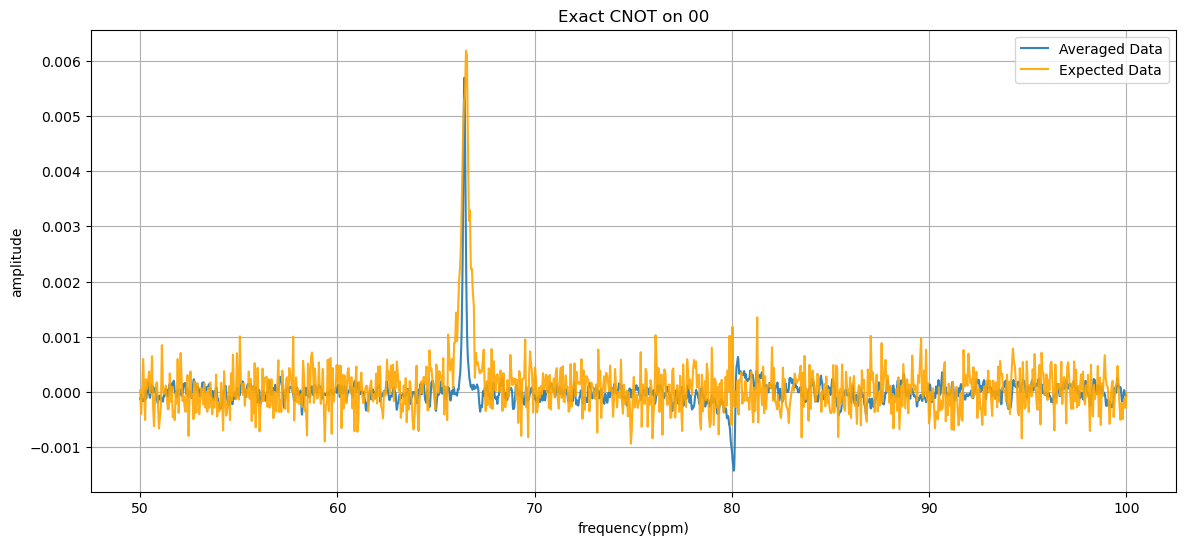

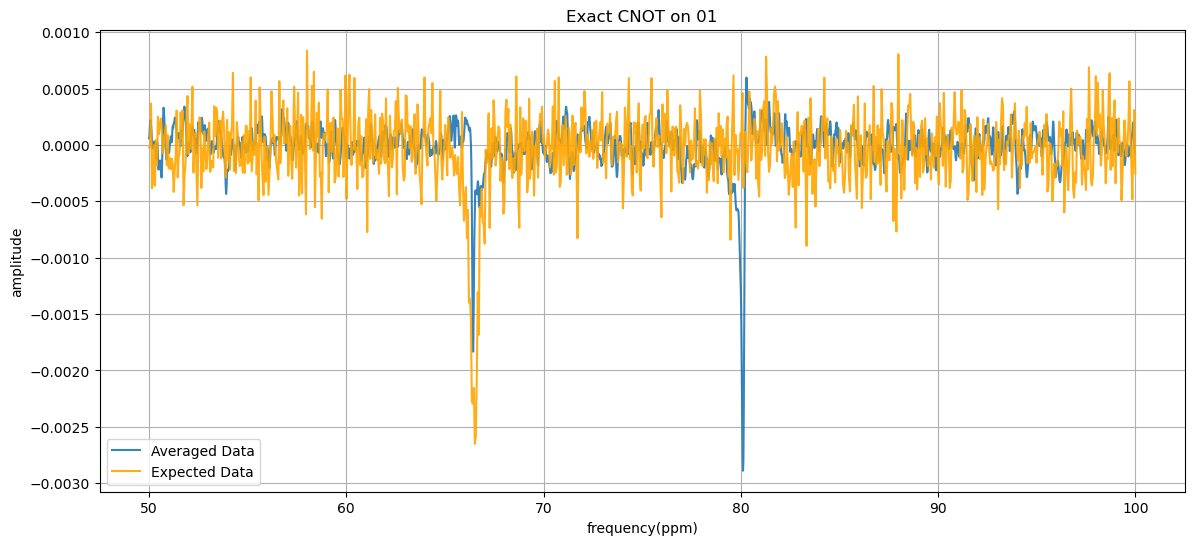

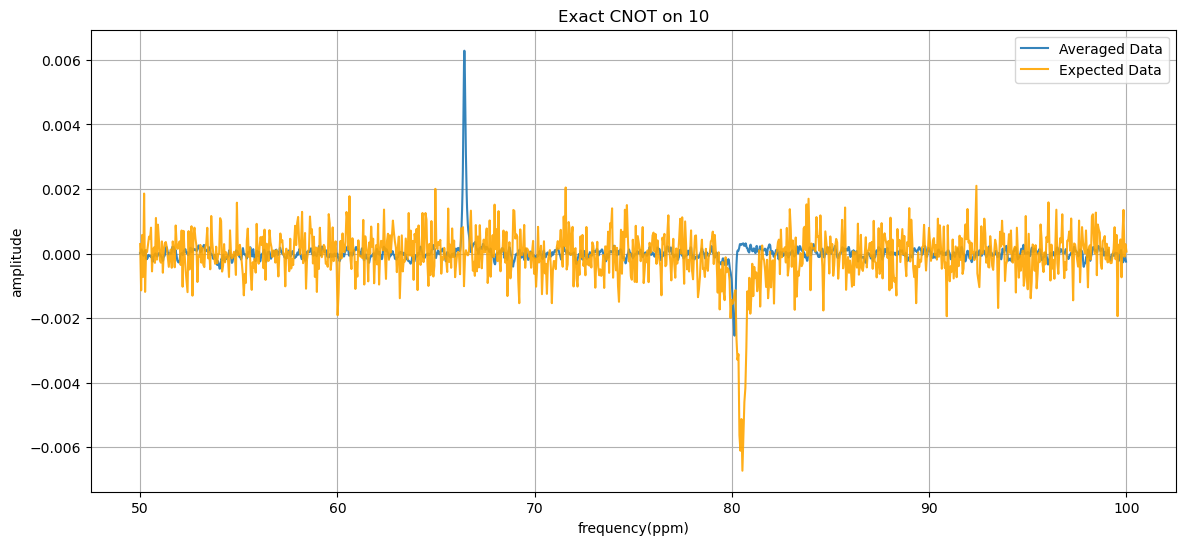

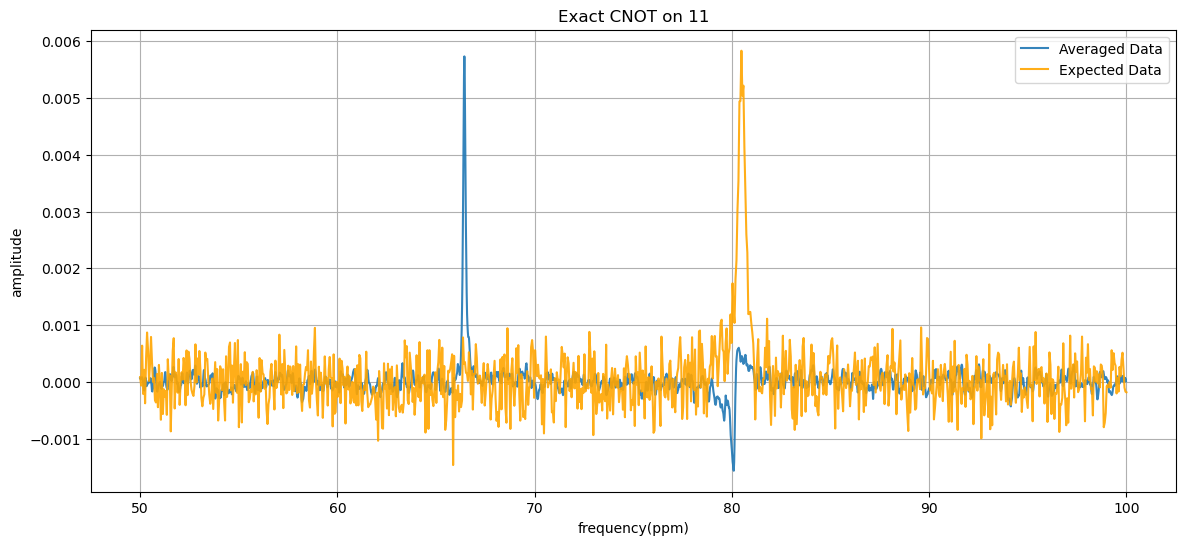

In [223]:
plot_data_with_offset('../lab_data/lab3/lab3_5/exp2/lab3_exp2_13C.csv', '../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_00_13C.csv', '../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_00_13C.csv' , x_name='frequency(ppm)', y_name='amplitude', title_name='Exact CNOT on 00', a=a, b=0, c=0, d=0, flip1=True, offset2=True, offset3=True)
plot_data_with_offset('../lab_data/lab3/lab3_5/exp2/lab3_exp2_13C.csv', '../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_01_13C.csv', '../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_01_13C.csv' , x_name='frequency(ppm)', y_name='amplitude', title_name='Exact CNOT on 01', a=0, b=b, c=0, d=0, flip1=True, offset2=True, offset3=True, flip2=True)
plot_data_with_offset('../lab_data/lab3/lab3_5/exp2/lab3_exp2_13C.csv', '../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_10_13C.csv', '../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_10_13C.csv' , x_name='frequency(ppm)', y_name='amplitude', title_name='Exact CNOT on 10', a=0, b=0, c=c, d=0, flip1=True, offset2=True, offset3=True)
plot_data_with_offset('../lab_data/lab3/lab3_5/exp2/lab3_exp2_13C.csv', '../lab_data/lab3/lab3_4/exp4/lab3_exp4_p1_11_13C.csv', '../lab_data/lab3/lab3_4/exp4/lab3_exp4_p2_11_13C.csv' , x_name='frequency(ppm)', y_name='amplitude', title_name='Exact CNOT on 11', a=0, b=0, c=0, d=d, flip1=True, offset2=True, offset3=True)